![Header](_src/money-gd9eca7990_640.jpg)
Imagen de <a href="https://pixabay.com/es/users/nattanan23-6312362/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=2724235">Nattanan Kanchanaprat</a> en <a href="https://pixabay.com/es//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=2724235">Pixabay</a>

# PRICE HOUSE PREDICTION

## Datathon - Proyecto Individual #2 Henry

### Author: Oscar Sánchez Díaz

https://www.linkedin.com/in/oscar-s%C3%A1nchez-d%C3%ADaz-72262590/


---

In [22]:
# Importando las librerías necesarias
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [90]:
# Cargando el archivo `train.parquet` para entrenar y testear el modelo
train_full = pd.read_parquet('/home/osanchezd/Downloads/train.parquet')

# Cargando el dataset para predicción del target
prediction_full = pd.read_parquet('/home/osanchezd/Downloads/test.parquet')

# Exploratory Data Analysis (EDA)

In [91]:
# Revisamos el shape de nuestros dataframes
print(f'Shape for train dataframe: {train_full.shape}')
print(f'Shape for test dataframe: {prediction_full.shape}')

Shape for train dataframe: (346479, 22)
Shape for test dataframe: (38498, 21)


In [92]:
# Visualizamos los primeros 5 renglones del dataset de entrenamiento
train_full.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,...,0,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn


In [93]:
# Revisamos por columna el tipo y la cantidad de valores no nulos en nuestro train dataset
train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   price                    346479 non-null  int64  
 5   type                     346479 non-null  object 
 6   sqfeet                   346479 non-null  int64  
 7   beds                     346479 non-null  int64  
 8   baths                    346479 non-null  float64
 9   cats_allowed             346479 non-null  int64  
 10  dogs_allowed             346479 non-null  int64  
 11  smoking_allowed          346479 non-null  int64  
 12  wheelchair_access        346479 non-null  int64  
 13  electric_vehicle_charge  346479 non-null  int64  
 14  come

In [94]:
# Revisamos los estadístivos de nuestro train dataset
train_full.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.464790e+05,3.464790e+05,3.464790e+05,346479.000000,346479.000000,346479.000000,346479.000000,346479.000000,346479.00000,346479.000000,346479.000000,344757.000000,344757.000000
mean,7.040988e+09,9.664420e+03,1.066326e+03,1.903189,1.480339,0.726803,0.707861,0.731738,0.08197,0.012792,0.048141,37.234363,-92.705415
std,8.802214e+06,4.703573e+06,2.018537e+04,3.162685,0.608246,0.445602,0.454746,0.443055,0.27432,0.112374,0.214065,5.550956,16.551071
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035988e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,33.453100,-100.784000
50%,7.043325e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,37.650100,-87.710800
75%,7.048431e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,41.137900,-81.174600
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,102.036000,172.633000


## Revisamos si existen datos nulos

In [95]:
print(train_full.isna().sum())

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             71171
parking_options            126682
image_url                       0
description                     2
lat                          1722
long                         1722
state                           0
dtype: int64


In [96]:
print(f'El porcentaje de datos faltantes para la columna `laundry_options` es de: {train_full["laundry_options"].isna().sum() / train_full.shape[0]}')
print(f'El porcentaje de datos faltantes para la columna `parking_options` es de: {train_full["parking_options"].isna().sum() / train_full.shape[0]}')
print(f'El porcentaje de datos faltantes para la columna `lat` es de: {train_full["lat"].isna().sum() / train_full.shape[0]}')
print(f'El porcentaje de datos faltantes para la columna `long` es de: {train_full["long"].isna().sum() / train_full.shape[0]}')

El porcentaje de datos faltantes para la columna `laundry_options` es de: 0.20541216062156725
El porcentaje de datos faltantes para la columna `parking_options` es de: 0.36562677680321176
El porcentaje de datos faltantes para la columna `lat` es de: 0.004969998181707983
El porcentaje de datos faltantes para la columna `long` es de: 0.004969998181707983


In [97]:
print(prediction_full.isna().sum())

id                             0
url                            0
region                         0
region_url                     0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options             7855
parking_options            14005
image_url                      0
description                    0
lat                          196
long                         196
state                          0
dtype: int64


In [98]:
print(f'El porcentaje de datos faltantes para la columna `laundry_options` es de: {prediction_full["laundry_options"].isna().sum() / prediction_full.shape[0]}')
print(f'El porcentaje de datos faltantes para la columna `parking_options` es de: {prediction_full["parking_options"].isna().sum() / prediction_full.shape[0]}')
print(f'El porcentaje de datos faltantes para la columna `lat` es de: {prediction_full["lat"].isna().sum() / prediction_full.shape[0]}')
print(f'El porcentaje de datos faltantes para la columna `long` es de: {prediction_full["long"].isna().sum() / prediction_full.shape[0]}')

El porcentaje de datos faltantes para la columna `laundry_options` es de: 0.2040365733284846
El porcentaje de datos faltantes para la columna `parking_options` es de: 0.363785131695153
El porcentaje de datos faltantes para la columna `lat` es de: 0.005091173567458049
El porcentaje de datos faltantes para la columna `long` es de: 0.005091173567458049


Observamos que tanto el train como en el test set, se presentan valores nulos en las columnas:

* laundry_options
* parking_options
* lat
* long

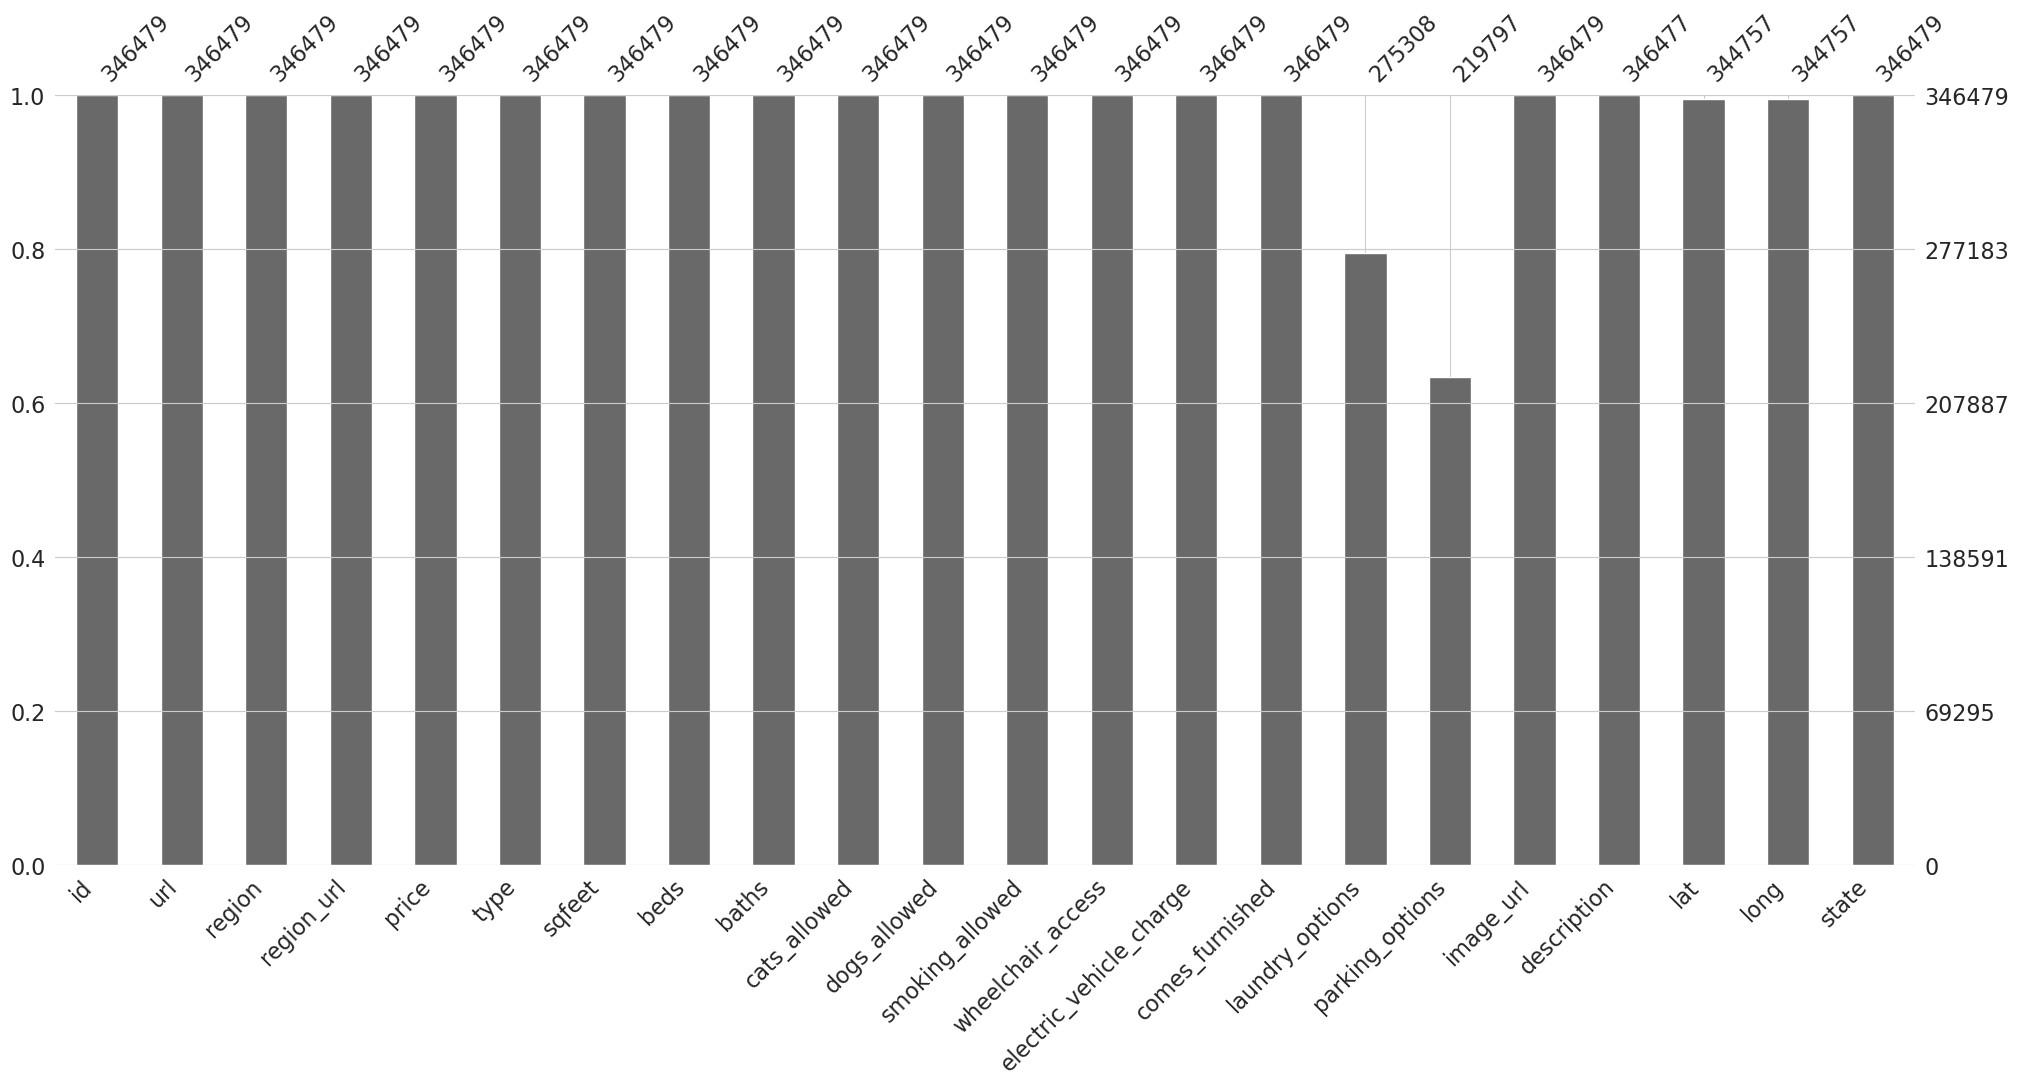

In [99]:
# Analizando gráficamente los valores nulos del set de entrenamiento
msno.bar(train_full)
plt.show()

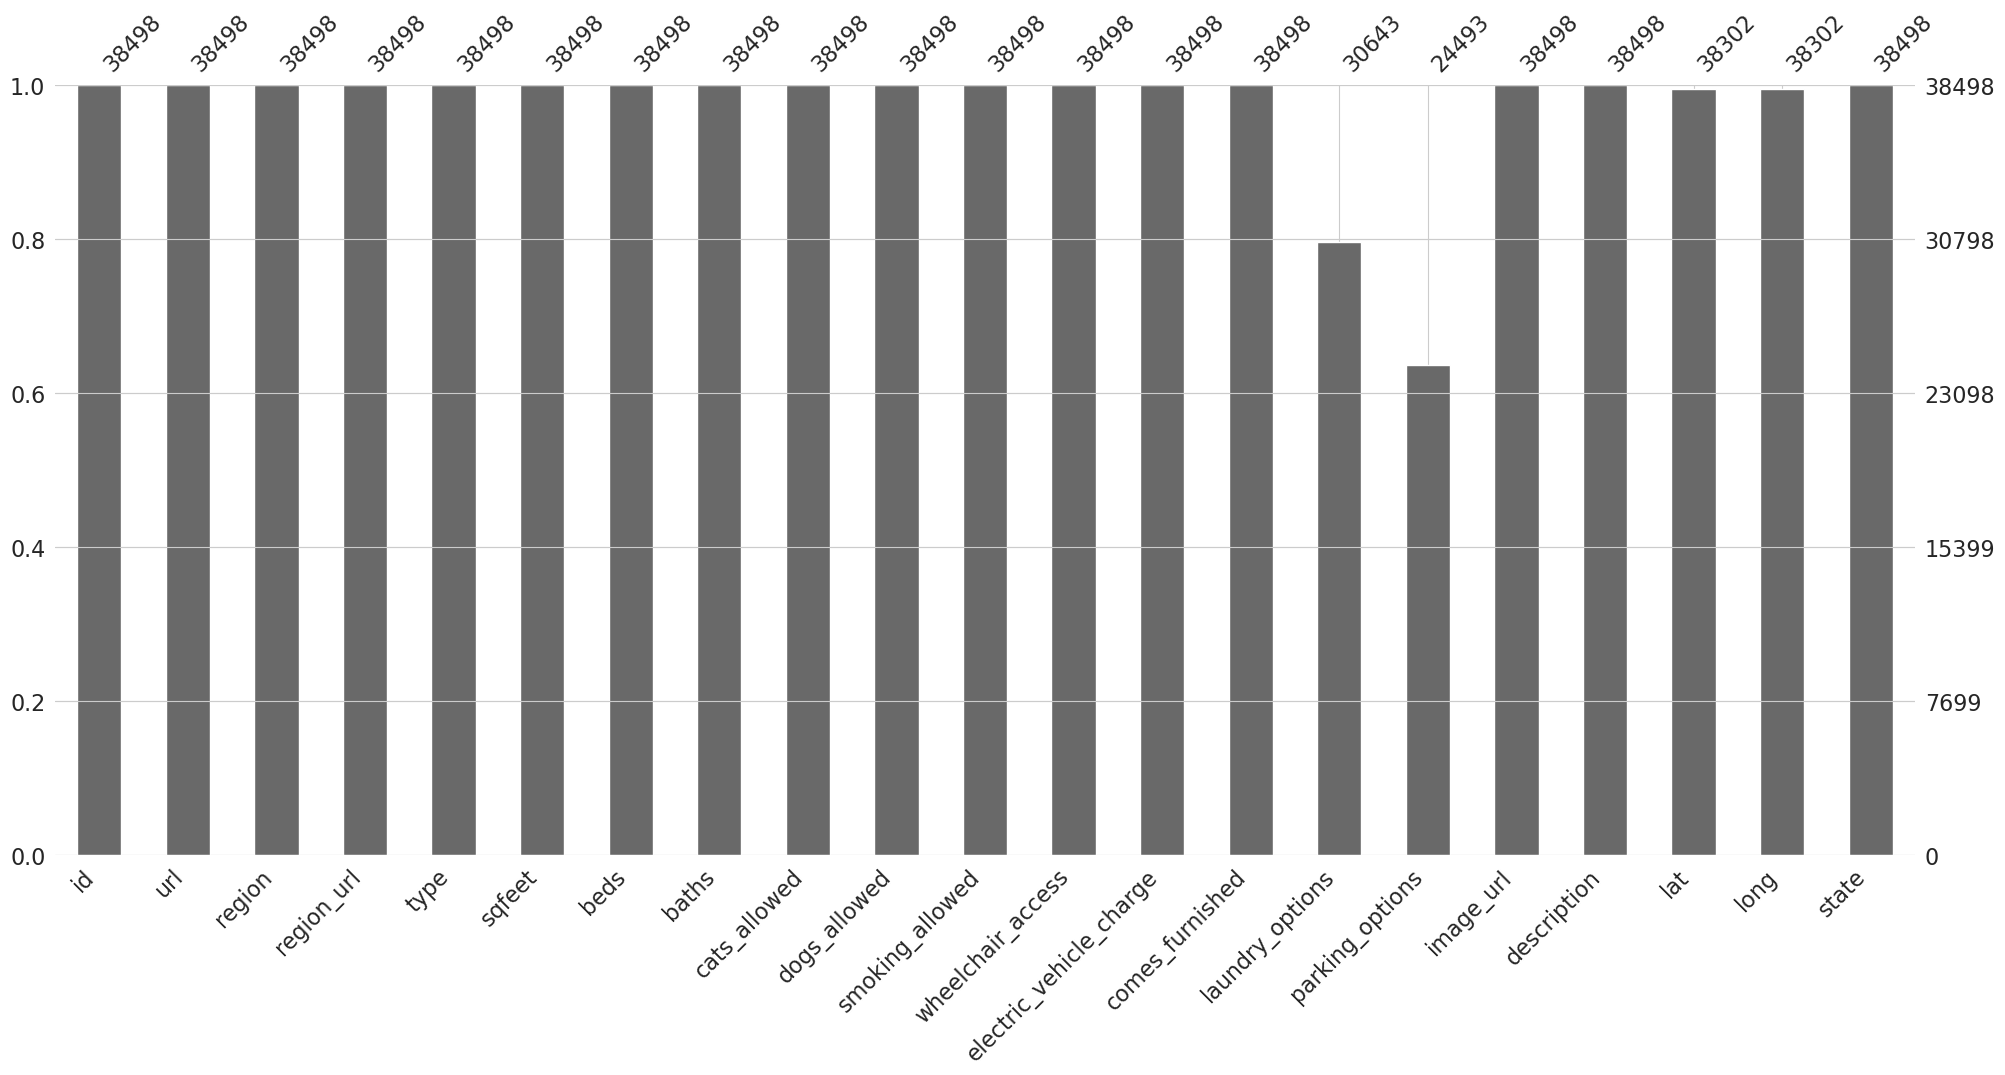

In [100]:
# Analizando gráficamente los valores nulos del set de predicción
msno.bar(prediction_full)
plt.show()

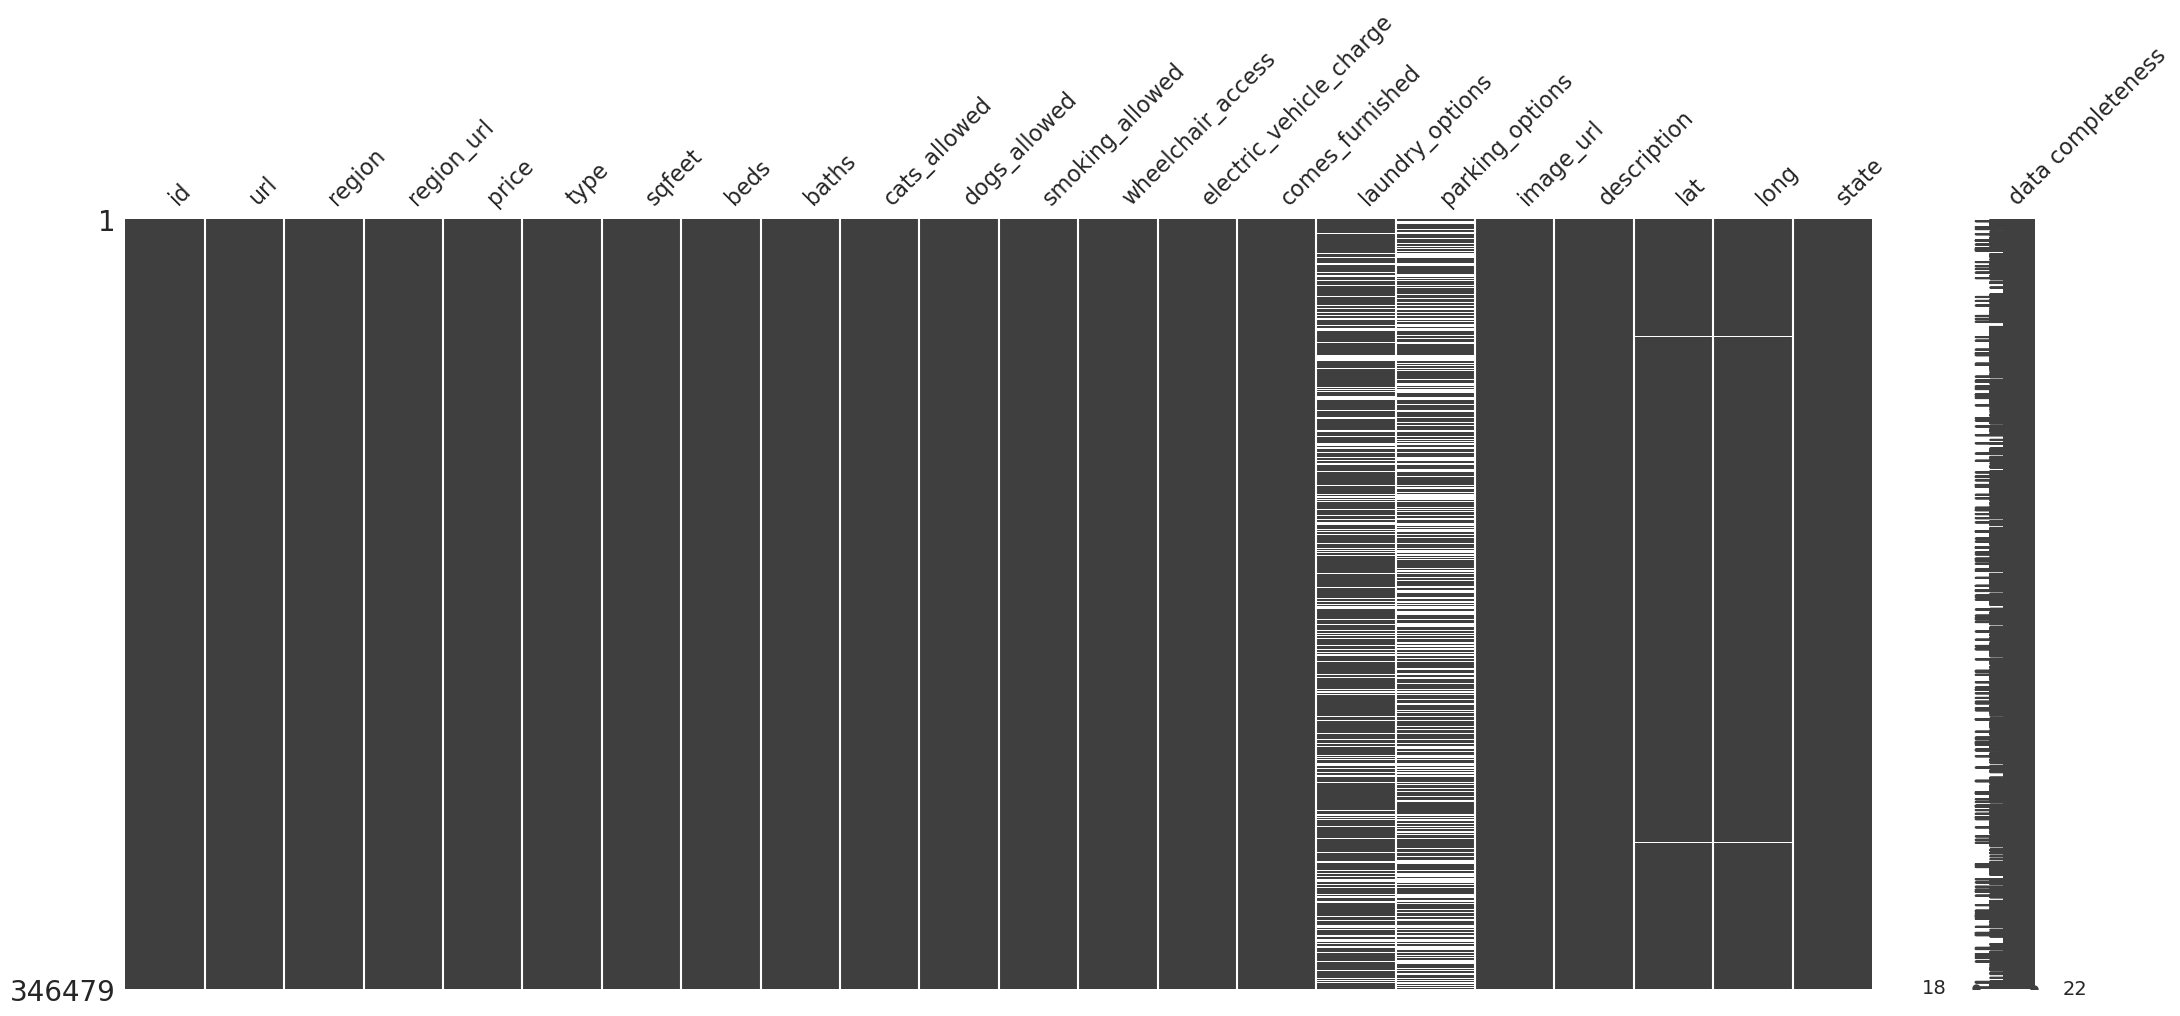

In [101]:
# Para el set de test
msno.matrix(train_full, labels=True)
plt.show()

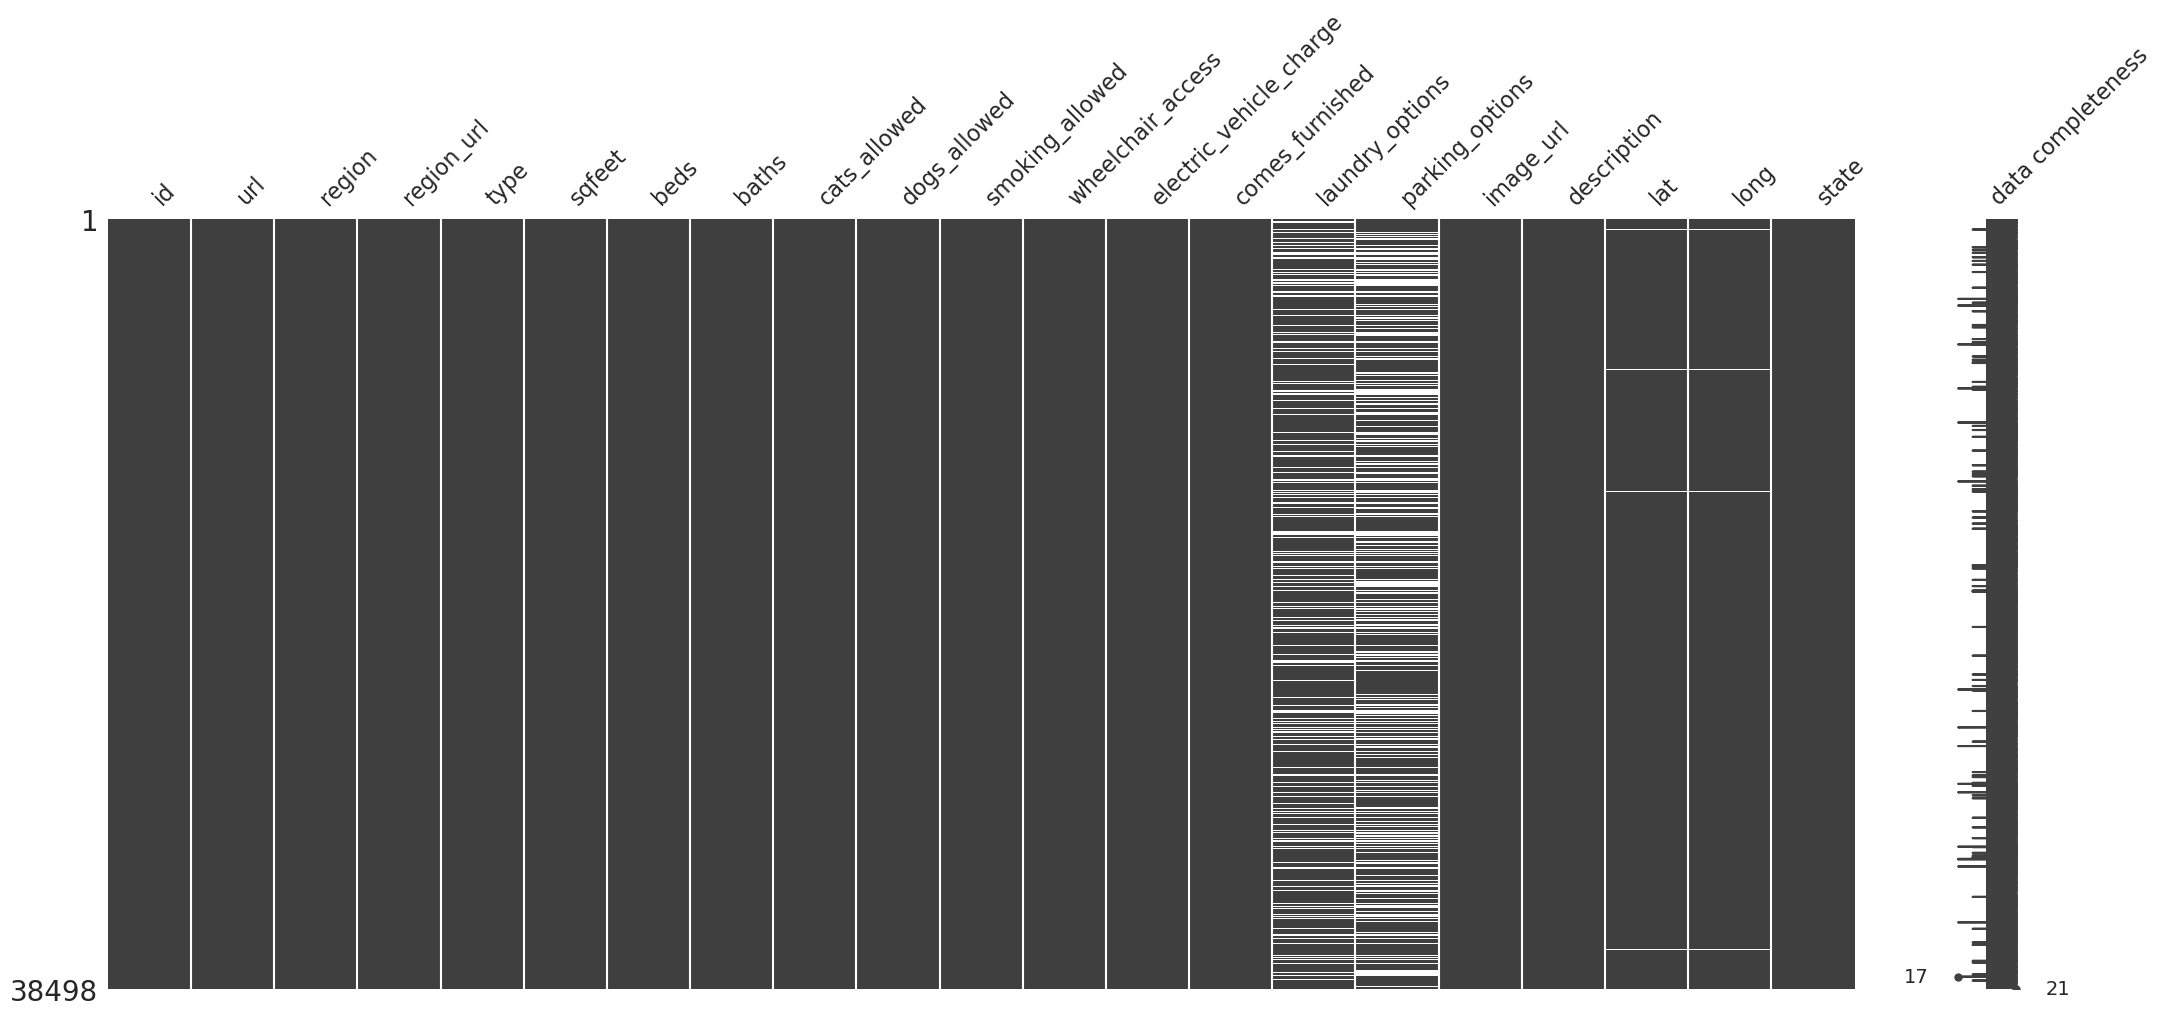

In [102]:
# Para el set de predicción
msno.matrix(prediction_full, labels=True)
plt.show()

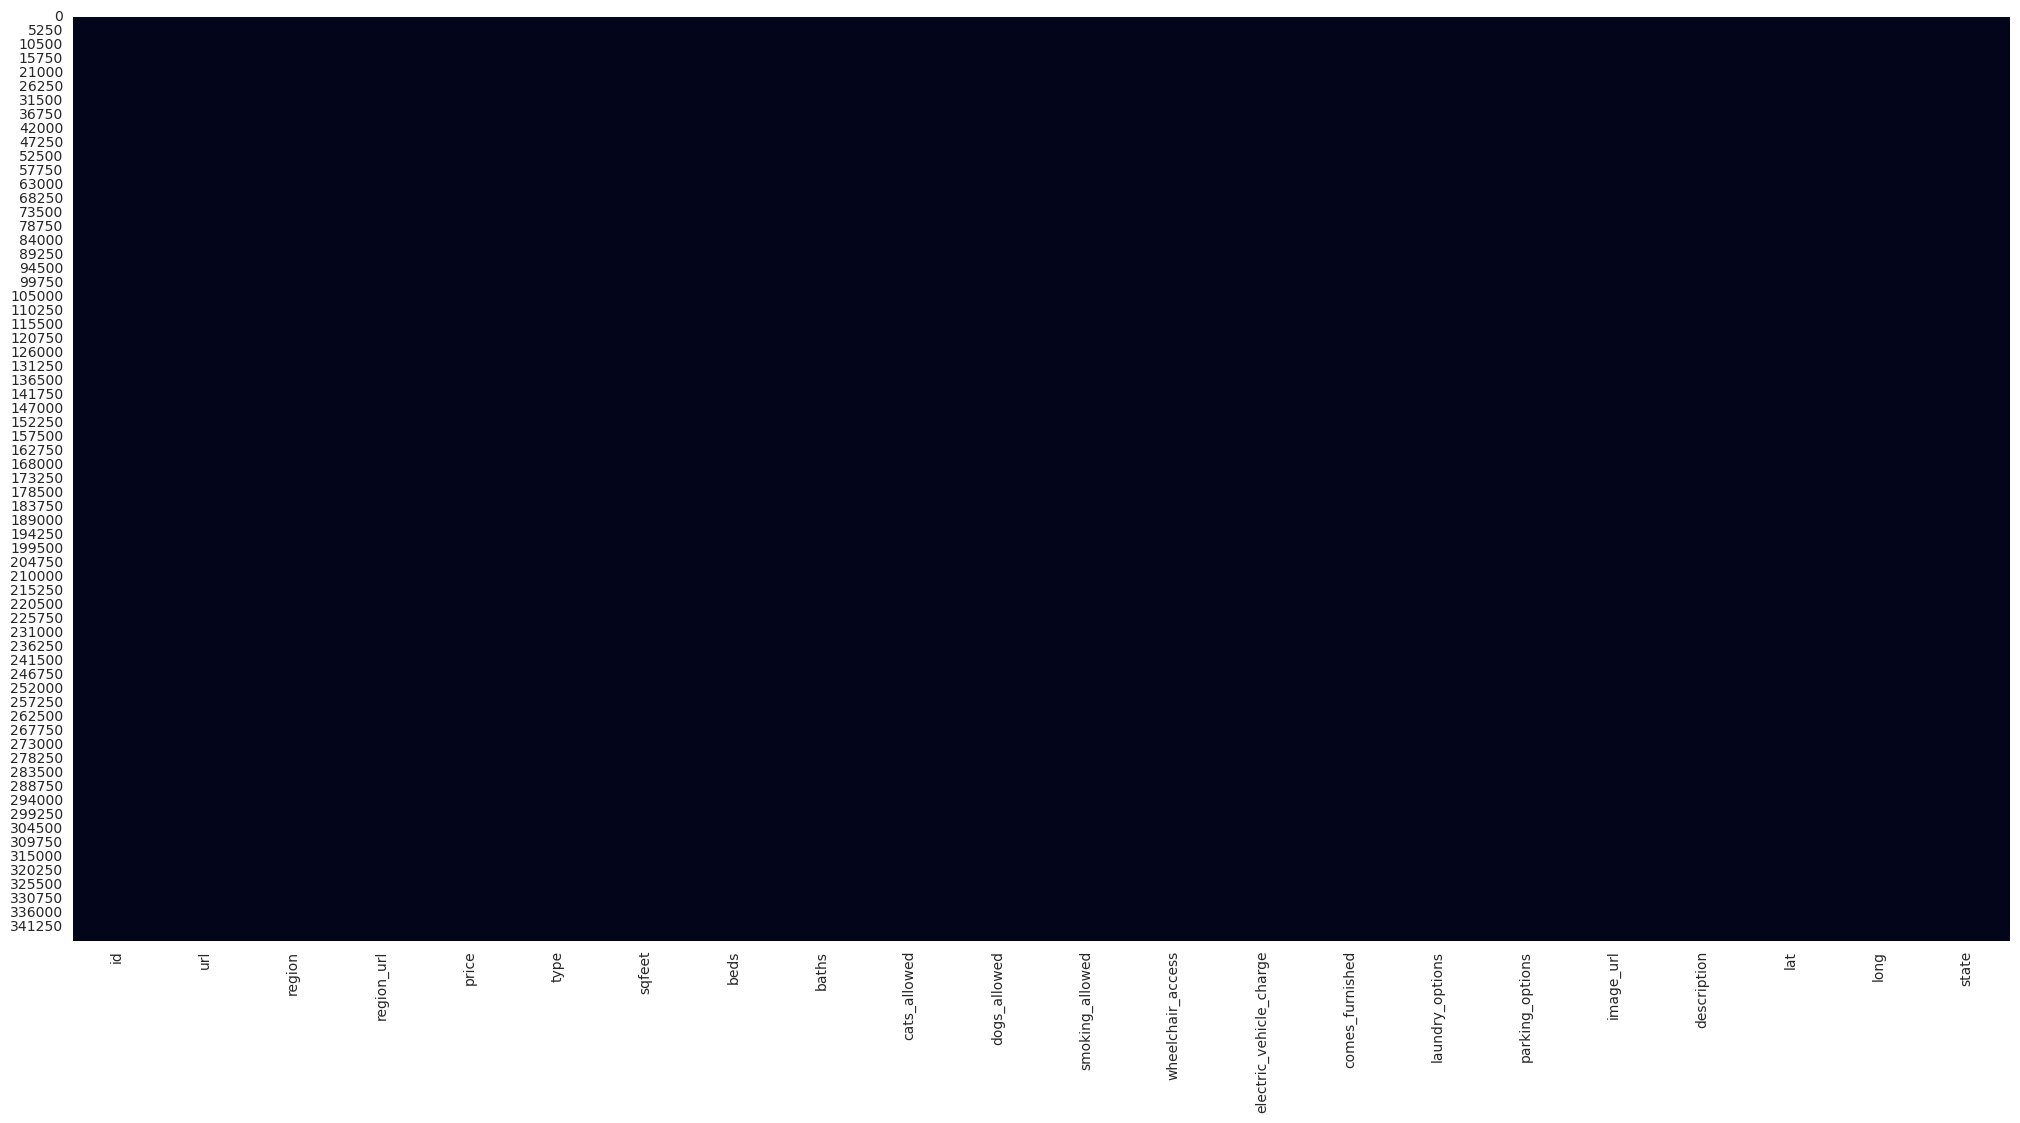

In [506]:
# Otra forma de visualizar la matriz para el set de training con seaborn
plt.figure(figsize=(25,12))
sns.heatmap(train_full.isnull(), cbar=False)
plt.show()

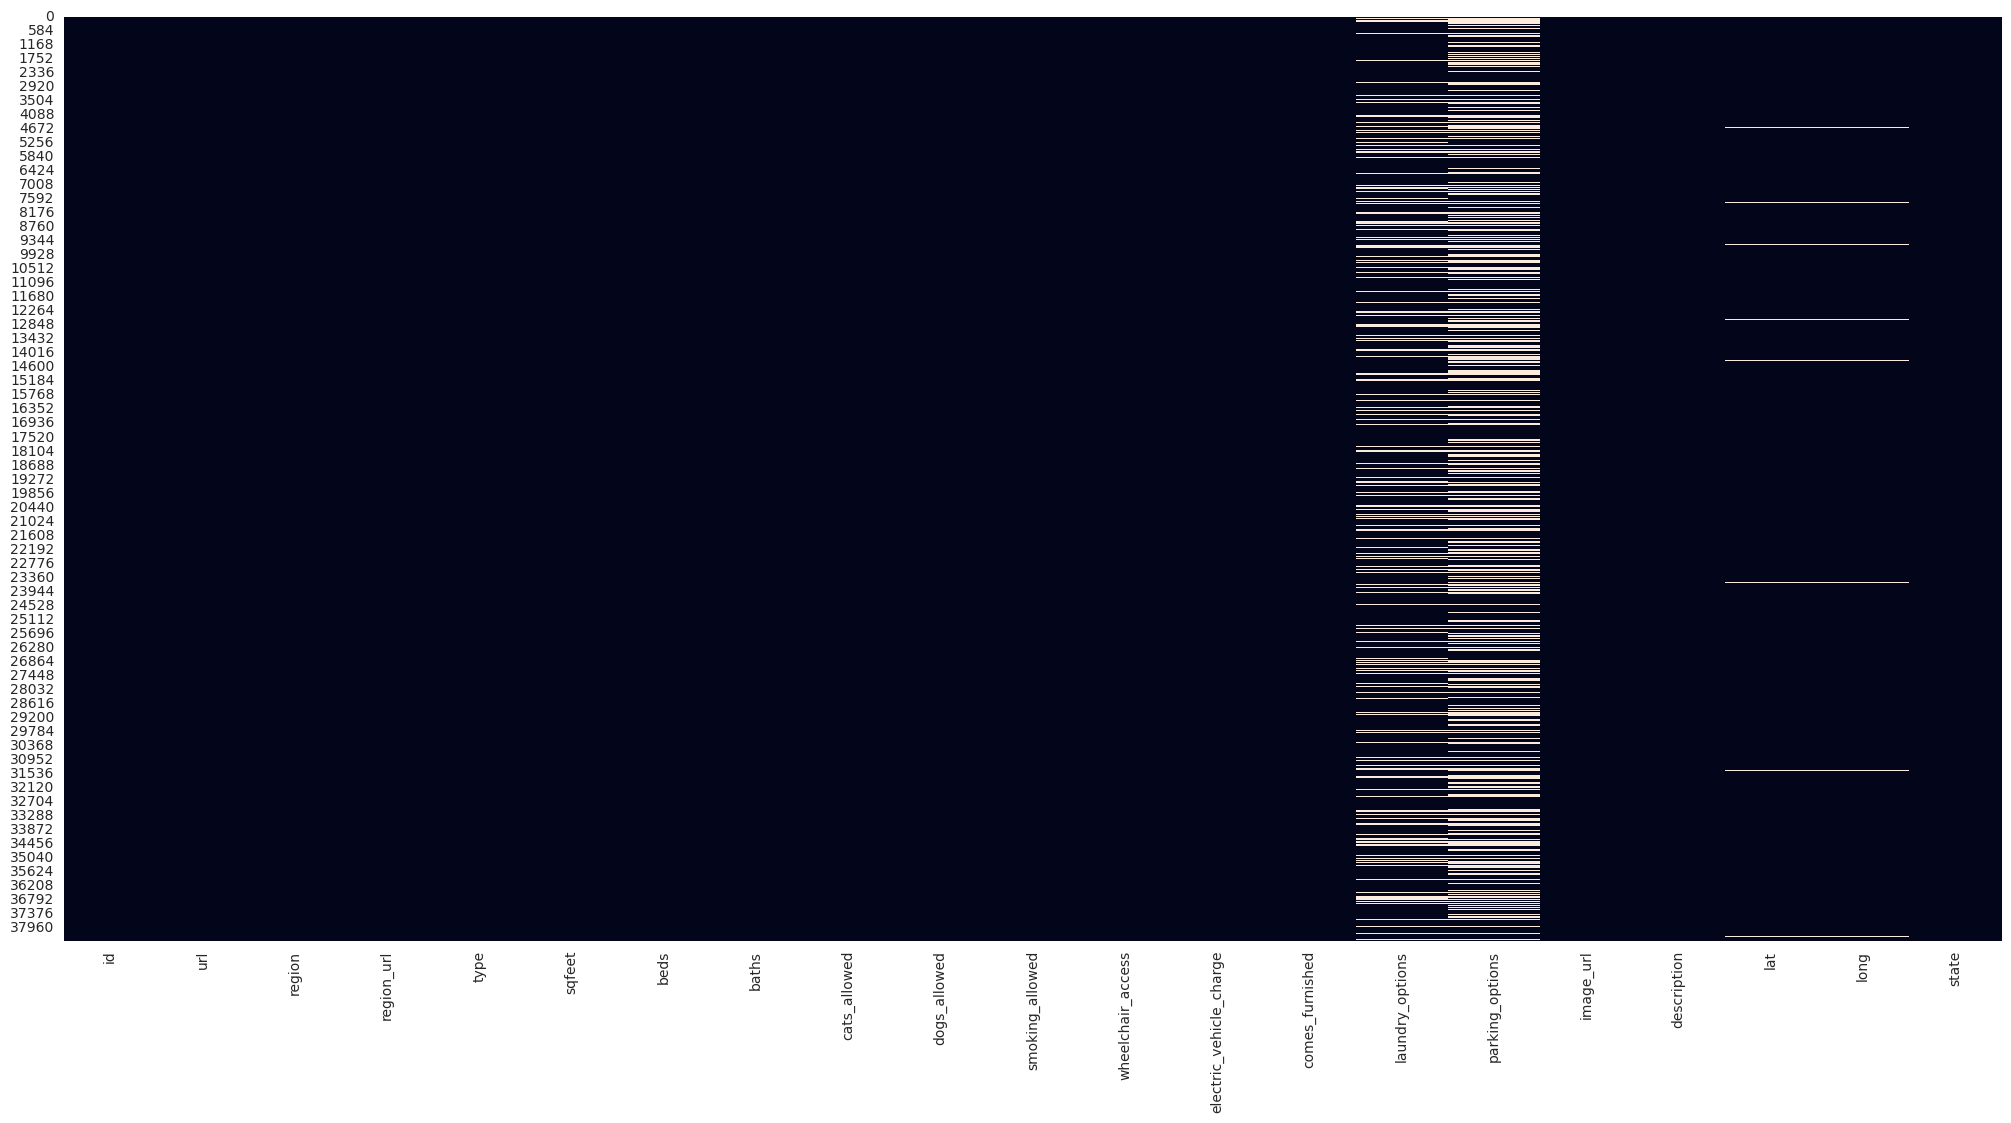

In [103]:
# Otra forma de visualizar la matriz para el set de predicción con seaborn
plt.figure(figsize=(25,12))
sns.heatmap(prediction_full.isnull(), cbar=False)
plt.show()

In [104]:
# Veamos que valores asume `laundry_options`
train_full['laundry_options'].value_counts()

w/d in unit           118627
w/d hookups            67941
laundry on site        52949
laundry in bldg        32513
no laundry on site      3278
Name: laundry_options, dtype: int64

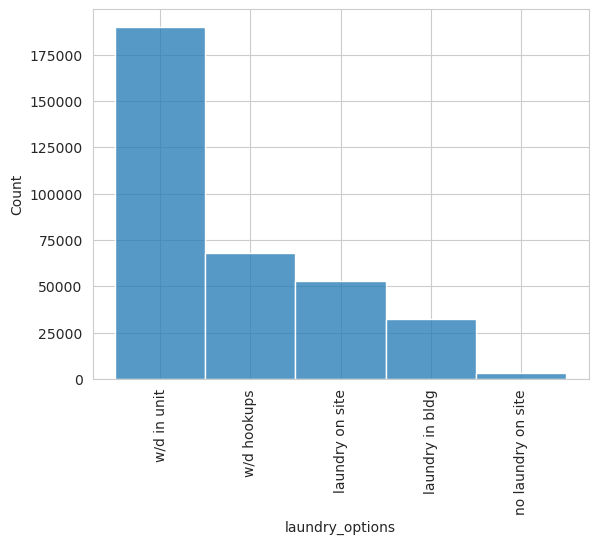

In [507]:
# Creamos un histograma para observar la distribución de los datos en el training set
sns.histplot(train_full['laundry_options'])
plt.xticks(rotation=90)
plt.show()

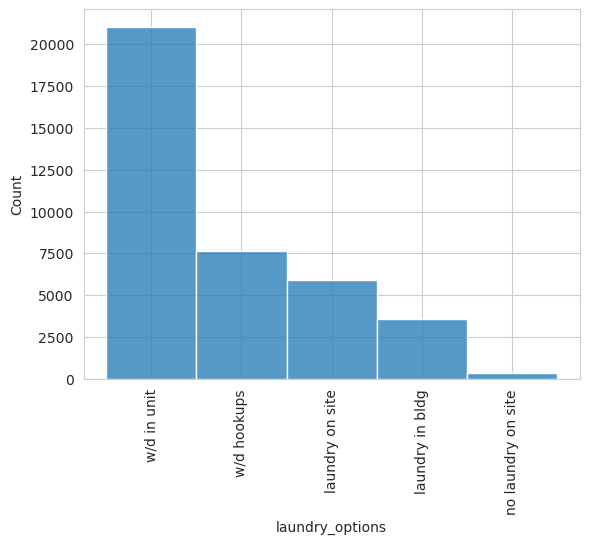

In [508]:
# Creamos un histograma para observar la distribución de los datos en el prediction set
sns.histplot(prediction_full['laundry_options'])
plt.xticks(rotation=90)
plt.show()

En ambos casos observamos que el elemento `w/d in unit` de la columna **laundry_options** es el que más veces se repite.

Por esta razón, se decide imputar los valores faltantes en la columna **laundry_options** con el valor de `w/d in unit`.

In [509]:
# Veamos que valores asume `parking_options` en el set de entrenamiento
train_full['parking_options'].value_counts()

off-street parking    242294
attached garage        36428
carport                35048
detached garage        15314
street parking         14370
no parking              2882
valet parking            143
Name: parking_options, dtype: int64

In [510]:
# Veamos que valores asume `parking_options` en el set de predicción
prediction_full['parking_options'].value_counts()

off-street parking    26895
attached garage        4163
carport                3907
detached garage        1626
street parking         1581
no parking              306
valet parking            20
Name: parking_options, dtype: int64

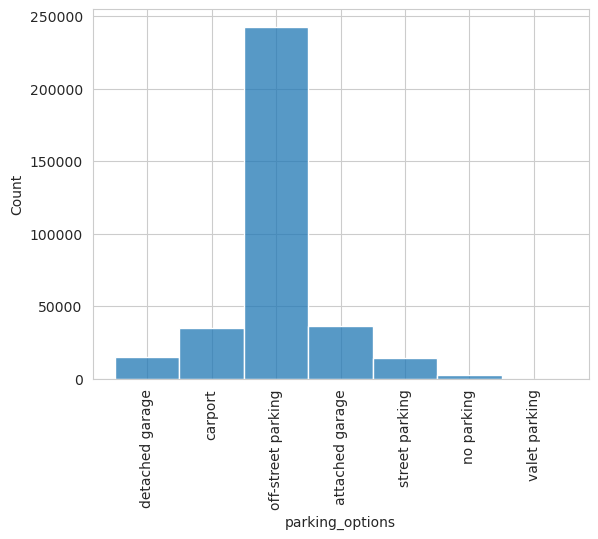

In [511]:
# Creamos un histograma para observar la distribución de los datos en el training set
sns.histplot(train_full['parking_options'])
plt.xticks(rotation=90)
plt.show()

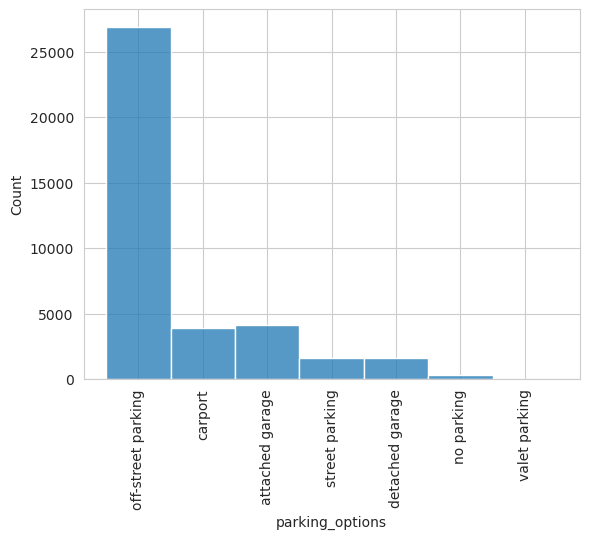

In [512]:
# Creamos un histograma para observar la distribución de los datos en el training set
sns.histplot(prediction_full['parking_options'])
plt.xticks(rotation=90)
plt.show()

En ambos casos observamos que el elemento `off'street parking` de la columna **parking_options** es el que más veces se repite.

Por esta razón, se decide imputar los valores faltantes en la columna **parking_options** con el valor de `off'street parking`.

## Imputando los valores faltantes (1/2)

En el caso particular de las columnas `laundry_options` y `parking options`, a través de un replace, imputaremos los valores nulos correspondientes a las columnas en cuestión con la moda de los mismos, ayudándonos con las siguientes líneas de código:

### Imputando valores nulos en la columna `laundry_options` tanto en el training como en el prediction set

In [106]:
# Imputando valores nulos en el training set
train_full['laundry_options'].replace(np.nan, 'w/d in unit', inplace=True)

In [109]:
# Observamos que haya aplicado correctamente la imputación de valores
train_full['laundry_options'].value_counts()

w/d in unit           189798
w/d hookups            67941
laundry on site        52949
laundry in bldg        32513
no laundry on site      3278
Name: laundry_options, dtype: int64

In [110]:
# Imputando valores nulos en el prediction set
prediction_full['laundry_options'].replace(np.nan, 'w/d in unit', inplace=True)

In [26]:
# Observamos que haya aplicado correctamente la imputación de valores
prediction_full['laundry_options'].value_counts()

w/d in unit           13156
w/d hookups            7627
laundry on site        5924
laundry in bldg        3590
no laundry on site      346
Name: laundry_options, dtype: int64

### Imputando valores nulos en la columna `parking_options` tanto en el training como en el prediction set

In [112]:
# Imputando valores nulos en el training set
train_full['parking_options'].replace(np.nan, 'off-street parking', inplace=True)

In [113]:
# Observamos que haya aplicado correctamente la imputación de valores
train_full['parking_options'].value_counts()

off-street parking    242294
attached garage        36428
carport                35048
detached garage        15314
street parking         14370
no parking              2882
valet parking            143
Name: parking_options, dtype: int64

In [114]:
# Imputando valores nulos en el training set
prediction_full['parking_options'].replace(np.nan, 'off-street parking', inplace=True)

In [115]:
# Observamos que haya aplicado correctamente la imputación de valores
prediction_full['parking_options'].value_counts()

off-street parking    26895
attached garage        4163
carport                3907
detached garage        1626
street parking         1581
no parking              306
valet parking            20
Name: parking_options, dtype: int64

## Imputando los valores faltantes (2/2)

Ahora observaremos la distribución de los datos en las columnas `lat` y `long`, para establecer con que cuál medida de tendencia central, imputaremos los datos faltantes en dichas columnas:

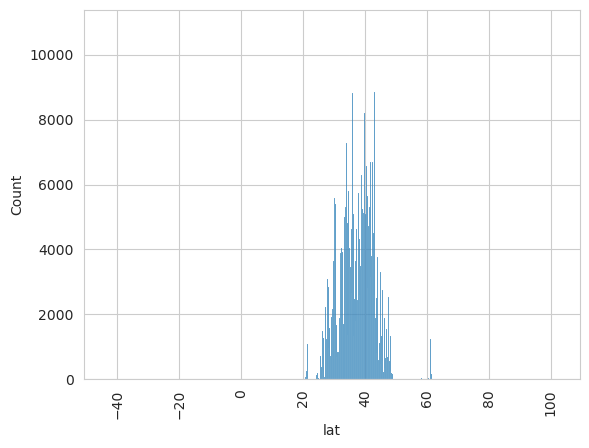

In [514]:
# Creamos un histograma para observar la distribución de los datos en el training set
sns.histplot(train_full['lat'])
plt.xticks(rotation=90)
plt.show()

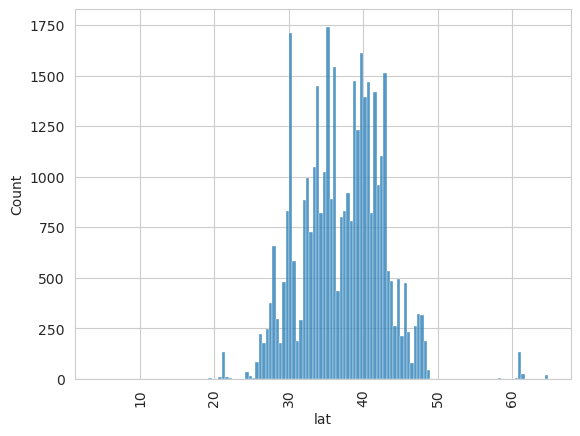

In [515]:
# Creamos un histograma para observar la distribución de los datos en el prediction set
sns.histplot(prediction_full['lat'])
plt.xticks(rotation=90)
plt.show()

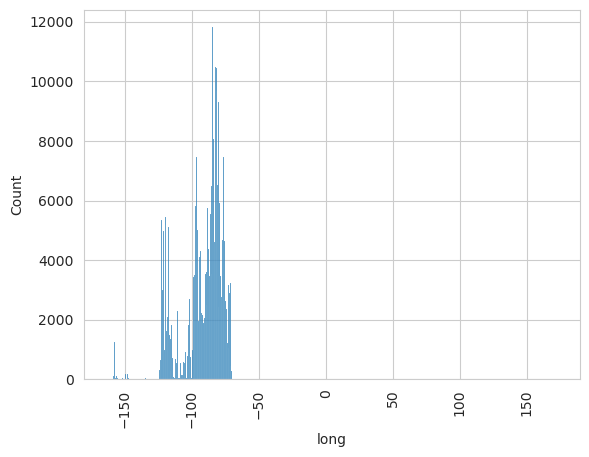

In [516]:
# Creamos un histograma para observar la distribución de los datos en el training set
sns.histplot(train_full['long'])
plt.xticks(rotation=90)
plt.show()

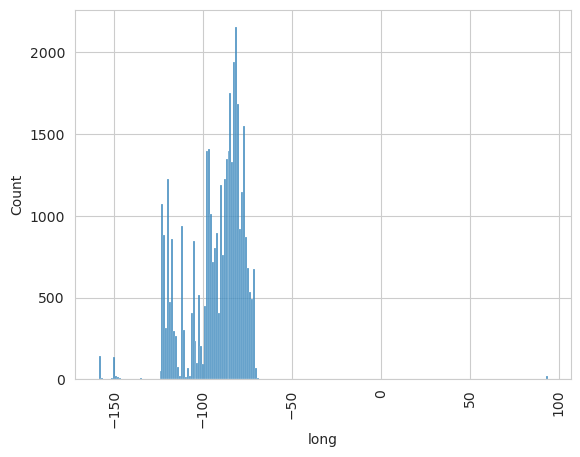

In [517]:
# Creamos un histograma para observar la distribución de los datos en el prediction set
sns.histplot(prediction_full['long'])
plt.xticks(rotation=90)
plt.show()

Es posible observar en los histogramas, que la **media** es un parámetro aceptable para imputar los valores faltantes presentes, en las columnas `lat` y `long`.

En el caso particular de las columnas `lat` y `long`, a través de la librería *SimpleImputer* de Scikit-Learn, imputaremos los valores nulos correspondientes a las columnas en cuestión con la **media** de los mismos, ayudándonos con las siguientes líneas de código:

# Imputando los valores faltantes

In [49]:
from sklearn.impute import SimpleImputer

In [128]:
print(f'Promedio de la columna "lat" en el train set: {train_full["lat"].mean()}')
print(f'Promedio de la columna "long" en el train set: {train_full["long"].mean()}')
print(f'Promedio de la columna "lat" en el prediction set: {prediction_full["lat"].mean()}')
print(f'Promedio de la columna "long" en el prediction set: {prediction_full["long"].mean()}')

Promedio de la columna "lat" en el train set: 37.23436312483832
Promedio de la columna "long" en el train set: -92.70541456571947
Promedio de la columna "lat" en el prediction set: 37.22559855960508
Promedio de la columna "long" en el prediction set: -92.6575733382078


In [129]:
# Imputando las columnas `lat` and `long` en el training set, utilizando la media como parámetro
imp = SimpleImputer(strategy='mean')
imp.fit(train_full[['lat']])
train_full['lat'] = imp.transform(train_full[['lat']])

In [130]:
imp = SimpleImputer(strategy='mean')
imp.fit(train_full[['long']])
train_full['long'] = imp.transform(train_full[['long']])

In [131]:
# Imputando las columnas `lat` and `long` en el test set , utilizando la media como parámetro
imp = SimpleImputer(strategy='mean')
imp.fit(prediction_full[['lat']])
prediction_full['lat'] = imp.transform(prediction_full[['lat']])

In [132]:
imp = SimpleImputer(strategy='mean')
imp.fit(prediction_full[['long']])
prediction_full['long'] = imp.transform(prediction_full[['long']])

### Resumen
Con valores imputados manualmente (`laundry_options` y `parking_options`)
Con valores imputados automáticamente (`lat` y `long`)

Ahora creamos una copia de nuestros datasets para trabajar de manera segura

In [158]:
train = train_full.copy()

In [159]:
prediction = prediction_full.copy()

Discretización/Binning de la columna `price`. Creando la columna `category_price`

In [160]:
# Creamos la columna `category price`
group_names = ['low', 'medium', 'high']
bins = [0, 999, 1999, train['price'].max()]
train['category_price'] = pd.cut(train['price'], bins=bins, labels=group_names, include_lowest=True)

In [162]:
train['category_price'].value_counts()

low       160654
medium    159804
high       26021
Name: category_price, dtype: int64

In [165]:
# Observamos como quedaron definidos nuestros rangos o grupos
print(train[train['category_price'] == 'low']['price'].min())
print(train[train['category_price'] == 'low']['price'].max())
print(train[train['category_price'] == 'medium']['price'].min())
print(train[train['category_price'] == 'medium']['price'].max())
print(train[train['category_price'] == 'high']['price'].min())
print(train[train['category_price'] == 'high']['price'].max())

0
999
1000
1999
2000
2768307249


# Detectando Outliers
## Revisamos las distribuciones de nuestro dataframe

In [166]:
import plots.functions as fc

In [167]:
train.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,category_price
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id,medium
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co,medium
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va,medium
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,...,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az,medium
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,...,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn,low


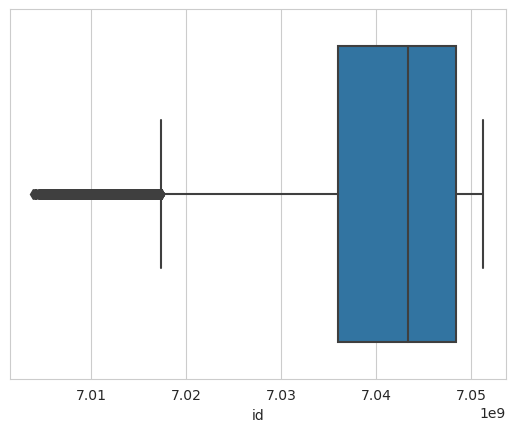

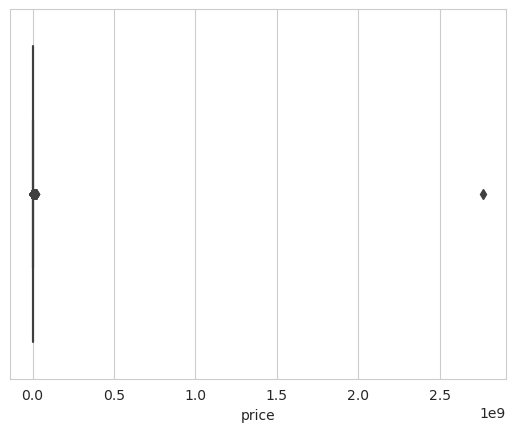

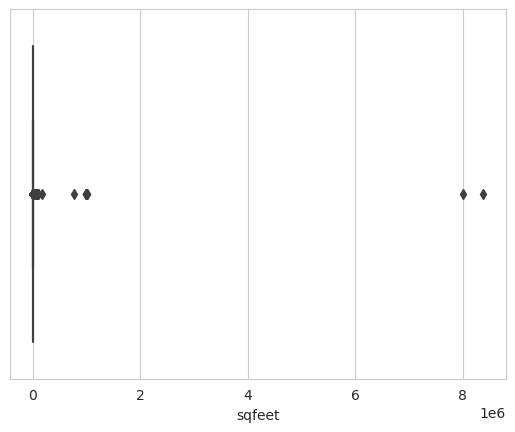

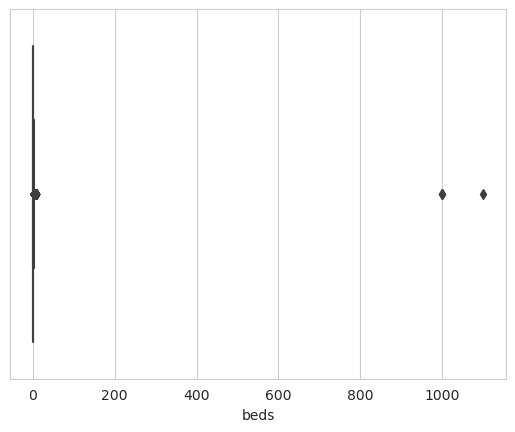

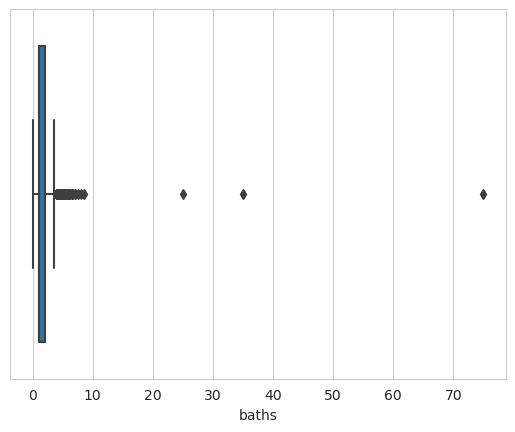

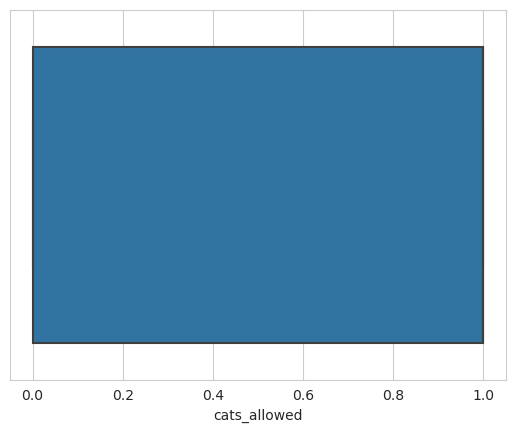

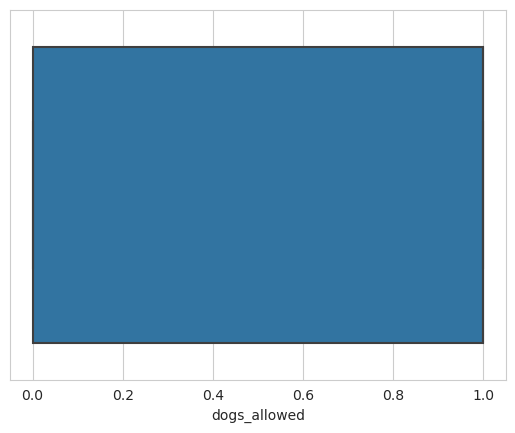

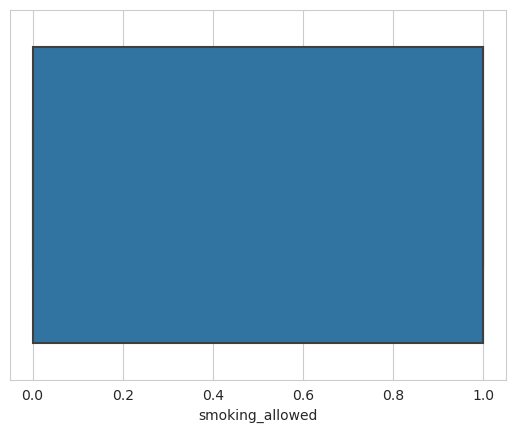

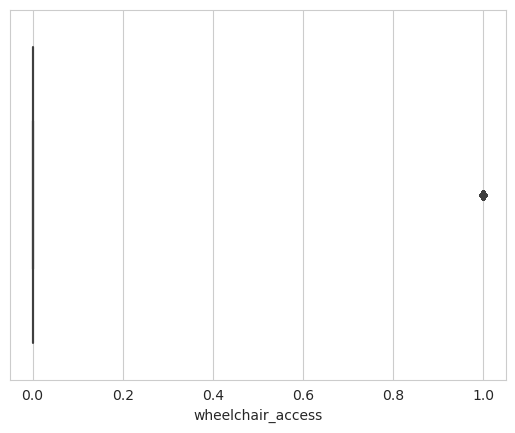

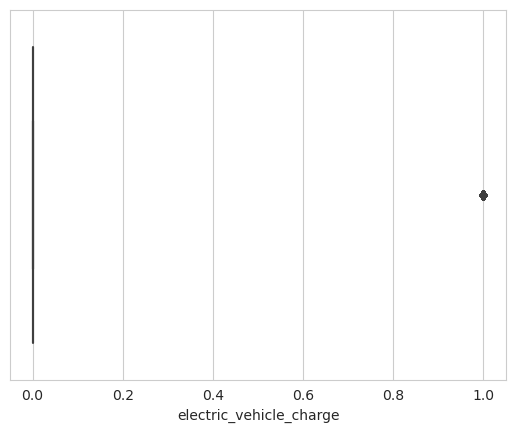

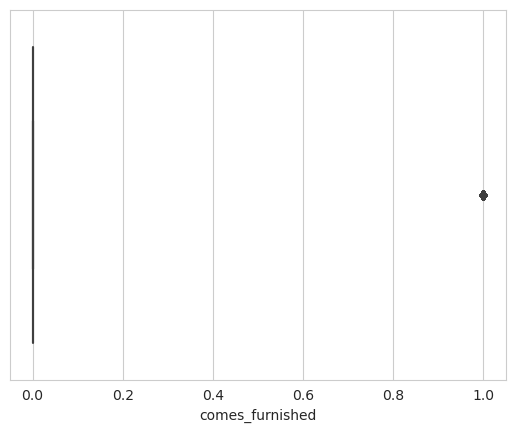

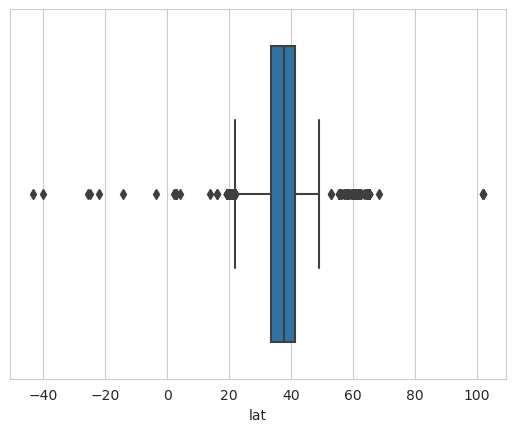

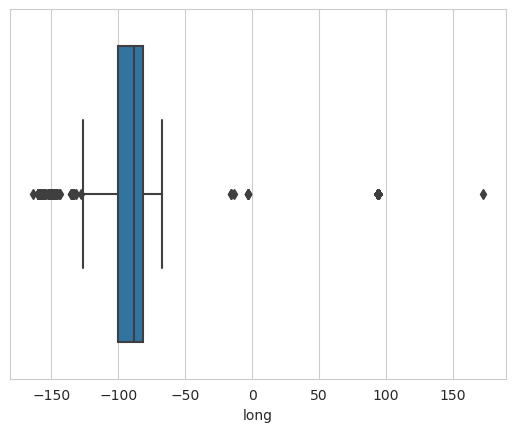

TypeError: Horizontal orientation requires numeric `x` variable.

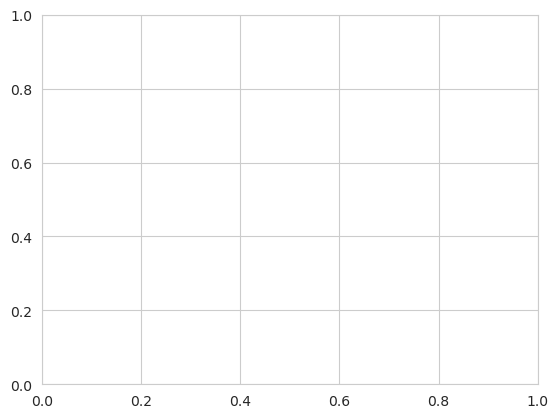

In [168]:
fc.plot_data_box(train)

In [169]:
# fc.plot_data_hist(train)

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

In [171]:
# La columna `price`, se eliminará más adelante (después de haber eliminado los outliers)
columns_to_drop_train = ['id' ,'url', 'region', 'region_url', 'type', 'image_url', 'description', 'state']
train.drop(columns=columns_to_drop_train, inplace=True)

In [173]:
columns_to_drop_prediction = ['id' ,'url', 'region', 'region_url', 'type', 'image_url', 'description', 'state']
prediction.drop(columns=columns_to_drop_prediction, inplace=True)

## Utilizaremos la técnica del Rango Intercuartílico para eliminar outliers.

### Para la columna `price`

In [174]:
Q1 = train['price'].quantile(0.25)
Q3 = train['price'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5 * IQR
BS = Q3 + 1.5 * IQR

print(f'Q1 de la columna `price`: {Q1}')
print(f'Q3 de la columna `price`: {Q3}')
print(f'El IQR de la columna `price` es: {IQR}')
print(f'Bigote inferior de la columna` price` es: {BI}')
print(f'Bigote superior de la columna `price` es: {BS}')

Q1 de la columna `price`: 805.0
Q3 de la columna `price`: 1395.0
El IQR de la columna `price` es: 590.0
Bigote inferior de la columna` price` es: -80.0
Bigote superior de la columna `price` es: 2280.0


In [175]:
# Delete rows Price's with price value == 0
indexPrice = train[train['price'] == 0].index

In [176]:
train.drop(indexPrice, inplace=True)

In [177]:
Q1 = train['price'].quantile(0.25)
Q3 = train['price'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5 * IQR
BS = Q3 + 1.5 * IQR

print(f'Q1 de la columna `price`: {Q1}')
print(f'Q3 de la columna `price`: {Q3}')
print(f'El IQR de la columna `price` es: {IQR}')
print(f'Bigote inferior de la columna` price` es: {BI}')
print(f'Bigote superior de la columna `price` es: {BS}')

Q1 de la columna `price`: 810.0
Q3 de la columna `price`: 1399.0
El IQR de la columna `price` es: 589.0
Bigote inferior de la columna` price` es: -73.5
Bigote superior de la columna `price` es: 2282.5


In [178]:
print(f'Cantidad de registros totales: {train.shape[0]}')
print(f'Cantidad de outliers en la columna `precio`: {train[(train["price"] < BI) | (train["price"] > BS)].shape[0]}')

Cantidad de registros totales: 345304
Cantidad de outliers en la columna `precio`: 16870


Eliminamos los outliers, es decir, aquellos valores que están por debajo del bigote inferior o por encima del bigote superior del boxplot. Para ello recurrimos a la siguiente línea de código:

In [179]:
out_price = (train['price'] < BI) | (train['price'] > BS)
train = train[~out_price]

In [180]:
print(f'Cantidad de registros totales: {train.shape[0]}')
print(f'Cantidad de outliers en la columna `precio`: {train[(train["price"] < BI) | (train["price"] > BS)].shape[0]}')
print(f'Tamaño del dataset, luego de eliminar outliers en la columna price: {train.shape[0]}')

Cantidad de registros totales: 328434
Cantidad de outliers en la columna `precio`: 0
Tamaño del dataset, luego de eliminar outliers en la columna price: 328434


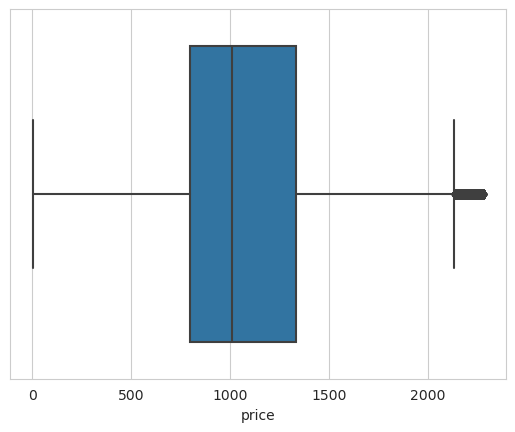

In [181]:
# Comprobamos que, haciendo una primera eliminación de outliers, la cantidad de valores extremos ahora se redujo notoriamente
sns.boxplot(x='price', data=train)
plt.show()

### Para la columna `sqfeet`


In [182]:
Q1 = train['sqfeet'].quantile(0.25)
Q3 = train['sqfeet'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5 * IQR
BS = Q3 + 1.5 * IQR

print(f'Q1 de la columna `sqfeet`: {Q1}')
print(f'Q3 de la columna `sqfeet`: {Q3}')
print(f'El IQR de la columna `sqfeet` es: {IQR}')
print(f'Bigote inferior de la columna` sqfeet` es: {BI}')
print(f'Bigote superior de la columna `sqfeet` es: {BS}')

Q1 de la columna `sqfeet`: 750.0
Q3 de la columna `sqfeet`: 1125.0
El IQR de la columna `sqfeet` es: 375.0
Bigote inferior de la columna` sqfeet` es: 187.5
Bigote superior de la columna `sqfeet` es: 1687.5


In [183]:
# Delete rows Price's with sqfeet value == 0
indexSqfeet = train[train['sqfeet'] == 0].index

In [184]:
train.drop(indexSqfeet, inplace=True)

/tmp/ipykernel_7043/545168858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(indexSqfeet, inplace=True)


In [185]:
Q1 = train['sqfeet'].quantile(0.25)
Q3 = train['sqfeet'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5 * IQR
BS = Q3 + 1.5 * IQR

print(f'Q1 de la columna `sqfeet`: {Q1}')
print(f'Q3 de la columna `sqfeet`: {Q3}')
print(f'El IQR de la columna `sqfeet` es: {IQR}')
print(f'Bigote inferior de la columna` sqfeet` es: {BI}')
print(f'Bigote superior de la columna `sqfeet` es: {BS}')

Q1 de la columna `sqfeet`: 750.0
Q3 de la columna `sqfeet`: 1125.0
El IQR de la columna `sqfeet` es: 375.0
Bigote inferior de la columna` sqfeet` es: 187.5
Bigote superior de la columna `sqfeet` es: 1687.5


In [186]:
print(f'Cantidad de registros totales: {train.shape[0]}')
print(f'Cantidad de outliers en la columna `sqfeet`: {train[(train["sqfeet"] < BI) | (train["sqfeet"] > BS)].shape[0]}')

Cantidad de registros totales: 328395
Cantidad de outliers en la columna `sqfeet`: 12933


Eliminamos los outliers, es decir, aquellos valores que están por debajo del bigote inferior o por encima del bigote superior del boxplot. Para ello recurrimos a la siguiente línea de código:

In [187]:
out_sqfeet = (train['sqfeet'] < BI) | (train['sqfeet'] > BS)
train = train[~out_sqfeet]

In [188]:
print(f'Cantidad de registros totales: {train.shape[0]}')
print(f'Cantidad de outliers en la columna `sqfeet`: {train[(train["sqfeet"] < BI) | (train["sqfeet"] > BS)].shape[0]}')
print(f'Tamaño del dataset, luego de eliminar outliers en la columna sqfeet: {train.shape[0]}')

Cantidad de registros totales: 315462
Cantidad de outliers en la columna `sqfeet`: 0
Tamaño del dataset, luego de eliminar outliers en la columna sqfeet: 315462


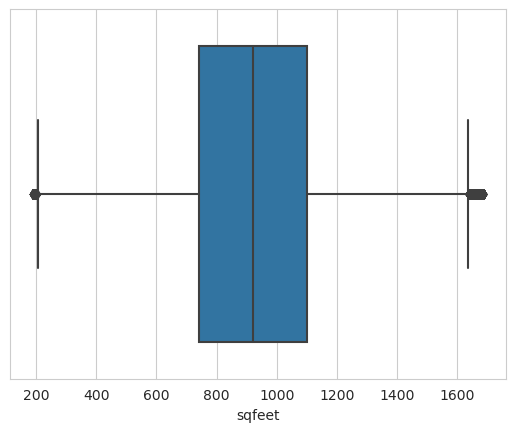

In [189]:
# Comprobamos que, haciendo una primera eliminación de outliers, la cantidad de valores extremos ahora se redujo notoriamente
sns.boxplot(x='sqfeet', data=train)
plt.show()

### Para la columna `beds`

In [190]:
Q1 = train['beds'].quantile(0.25)
Q3 = train['beds'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5 * IQR
BS = Q3 + 1.5 * IQR

print(f'Q1 de la columna `beds`: {Q1}')
print(f'Q3 de la columna `beds`: {Q3}')
print(f'El IQR de la columna `beds` es: {IQR}')
print(f'Bigote inferior de la columna` beds` es: {BI}')
print(f'Bigote superior de la columna `beds` es: {BS}')

Q1 de la columna `beds`: 1.0
Q3 de la columna `beds`: 2.0
El IQR de la columna `beds` es: 1.0
Bigote inferior de la columna` beds` es: -0.5
Bigote superior de la columna `beds` es: 3.5


In [191]:
# Delete rows Price's with beds value == 0
indexBeds = train[train['beds'] == 0].index

In [192]:
train.drop(indexBeds, inplace=True)

In [193]:
Q1 = train['beds'].quantile(0.25)
Q3 = train['beds'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5 * IQR
BS = Q3 + 1.5 * IQR

print(f'Q1 de la columna `beds`: {Q1}')
print(f'Q3 de la columna `beds`: {Q3}')
print(f'El IQR de la columna `beds` es: {IQR}')
print(f'Bigote inferior de la columna` beds` es: {BI}')
print(f'Bigote superior de la columna `beds` es: {BS}')

Q1 de la columna `beds`: 1.0
Q3 de la columna `beds`: 2.0
El IQR de la columna `beds` es: 1.0
Bigote inferior de la columna` beds` es: -0.5
Bigote superior de la columna `beds` es: 3.5


In [194]:
print(f'Cantidad de registros totales: {train.shape[0]}')
print(f'Cantidad de outliers en la columna `beds`: {train[(train["beds"] < BI) | (train["beds"] > BS)].shape[0]}')

Cantidad de registros totales: 306009
Cantidad de outliers en la columna `beds`: 5338


Eliminamos los outliers, es decir, aquellos valores que están por debajo del bigote inferior o por encima del bigote superior del boxplot. Para ello recurrimos a la siguiente línea de código:

In [195]:
out_beds = (train['beds'] < BI) | (train['beds'] > BS)
train = train[~out_beds]

In [196]:
print(f'Cantidad de registros totales: {train.shape[0]}')
print(f'Cantidad de outliers en la columna `beds`: {train[(train["beds"] < BI) | (train["beds"] > BS)].shape[0]}')
print(f'Tamaño del dataset, luego de eliminar outliers en la columna beds: {train.shape[0]}')

Cantidad de registros totales: 300671
Cantidad de outliers en la columna `beds`: 0
Tamaño del dataset, luego de eliminar outliers en la columna beds: 300671


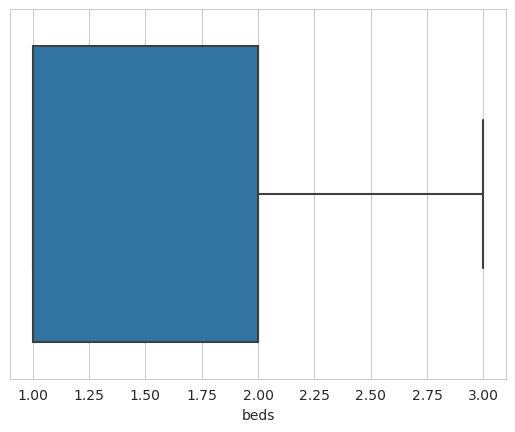

In [197]:
# Comprobamos que, haciendo una primera eliminación de outliers, la cantidad de valores extremos ahora se redujo notoriamente
sns.boxplot(x='beds', data=train)
plt.show()

### Para la columna `baths`

In [198]:
Q1 = train['baths'].quantile(0.25)
Q3 = train['baths'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5 * IQR
BS = Q3 + 1.5 * IQR

print(f'Q1 de la columna `baths`: {Q1}')
print(f'Q3 de la columna `baths`: {Q3}')
print(f'El IQR de la columna `baths` es: {IQR}')
print(f'Bigote inferior de la columna` baths` es: {BI}')
print(f'Bigote superior de la columna `baths` es: {BS}')

Q1 de la columna `baths`: 1.0
Q3 de la columna `baths`: 2.0
El IQR de la columna `baths` es: 1.0
Bigote inferior de la columna` baths` es: -0.5
Bigote superior de la columna `baths` es: 3.5


In [199]:
# Delete rows Price's with beds value == 0
indexBeds = train[train['beds'] == 0].index

In [200]:
train.drop(indexBeds, inplace=True)

In [201]:
Q1 = train['beds'].quantile(0.25)
Q3 = train['beds'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5 * IQR
BS = Q3 + 1.5 * IQR

print(f'Q1 de la columna `beds`: {Q1}')
print(f'Q3 de la columna `beds`: {Q3}')
print(f'El IQR de la columna `beds` es: {IQR}')
print(f'Bigote inferior de la columna` beds` es: {BI}')
print(f'Bigote superior de la columna `beds` es: {BS}')

Q1 de la columna `beds`: 1.0
Q3 de la columna `beds`: 2.0
El IQR de la columna `beds` es: 1.0
Bigote inferior de la columna` beds` es: -0.5
Bigote superior de la columna `beds` es: 3.5


In [202]:
print(f'Cantidad de registros totales: {train.shape[0]}')
print(f'Cantidad de outliers en la columna `baths`: {train[(train["baths"] < BI) | (train["baths"] > BS)].shape[0]}')

Cantidad de registros totales: 300671
Cantidad de outliers en la columna `baths`: 41


Eliminamos los outliers, es decir, aquellos valores que están por debajo del bigote inferior o por encima del bigote superior del boxplot. Para ello recurrimos a la siguiente línea de código:

In [203]:
out_baths = (train['baths'] < BI) | (train['baths'] > BS)
train = train[~out_baths]

In [204]:
print(f'Cantidad de registros totales: {train.shape[0]}')
print(f'Cantidad de outliers en la columna `baths`: {train[(train["baths"] < BI) | (train["baths"] > BS)].shape[0]}')
print(f'Tamaño del dataset, luego de eliminar outliers en la columna baths: {train.shape[0]}')

Cantidad de registros totales: 300630
Cantidad de outliers en la columna `baths`: 0
Tamaño del dataset, luego de eliminar outliers en la columna baths: 300630


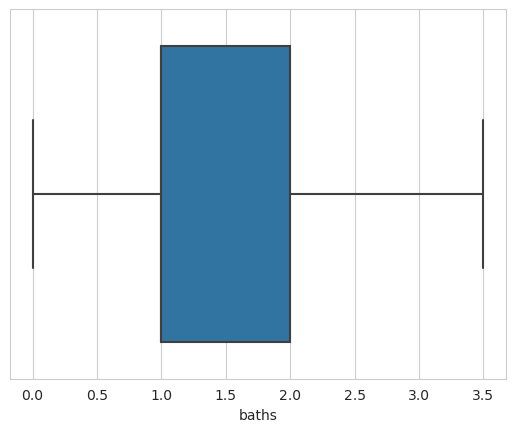

In [205]:
# Comprobamos que, haciendo una primera eliminación de outliers, la cantidad de valores extremos ahora se redujo notoriamente
sns.boxplot(x='baths', data=train)
plt.show()

Lat and long
Revisando las latitudes y longitudes de nuestro dataset

In [206]:
train['lat'].describe()

count    300630.000000
mean         37.192626
std           5.504588
min         -40.266600
25%          33.381300
50%          37.364600
75%          41.110800
max         102.036000
Name: lat, dtype: float64

In [207]:
train['long'].describe()

count    300630.000000
mean        -92.022173
std          15.896282
min        -163.894000
25%         -97.940400
50%         -87.418250
75%         -81.241600
max          94.156100
Name: long, dtype: float64

## Graficamos las columnas `lat` and `long` para conocer cuáles coordenadas se encuentran fuera de la zona de interés y así poder eliminar esos outliers.

In [208]:
import geopandas as gpd
from shapely.geometry import Point

In [209]:
geometry = [Point(xy) for xy in zip(train['long'], train['lat'])]
geometry[:3]

[<POINT (-116.225 43.585)>, <POINT (-104.78 38.914)>, <POINT (-76.164 36.792)>]

In [210]:
geo_df = gpd.GeoDataFrame(train, crs = {'init': 'epsg:4326'}, geometry=geometry)

/home/osanchezd/anaconda3/envs/HENRY/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [211]:
geo_df.head()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,category_price,geometry
0,1350,1200,2,2.0,1,1,1,0,0,0,w/d in unit,detached garage,43.5851,-116.2250,medium,POINT (-116.22500 43.58510)
1,1115,694,1,1.0,1,1,1,0,0,0,w/d in unit,carport,38.9137,-104.7800,medium,POINT (-104.78000 38.91370)
2,1129,900,2,2.0,0,0,1,0,0,0,w/d hookups,off-street parking,36.7922,-76.1643,medium,POINT (-76.16430 36.79220)
3,1580,1469,3,2.0,1,1,1,0,0,0,w/d in unit,off-street parking,33.5623,-112.0560,medium,POINT (-112.05600 33.56230)
4,995,700,1,1.0,1,1,1,0,0,0,w/d in unit,carport,36.0595,-86.6592,low,POINT (-86.65920 36.05950)


<AxesSubplot:>

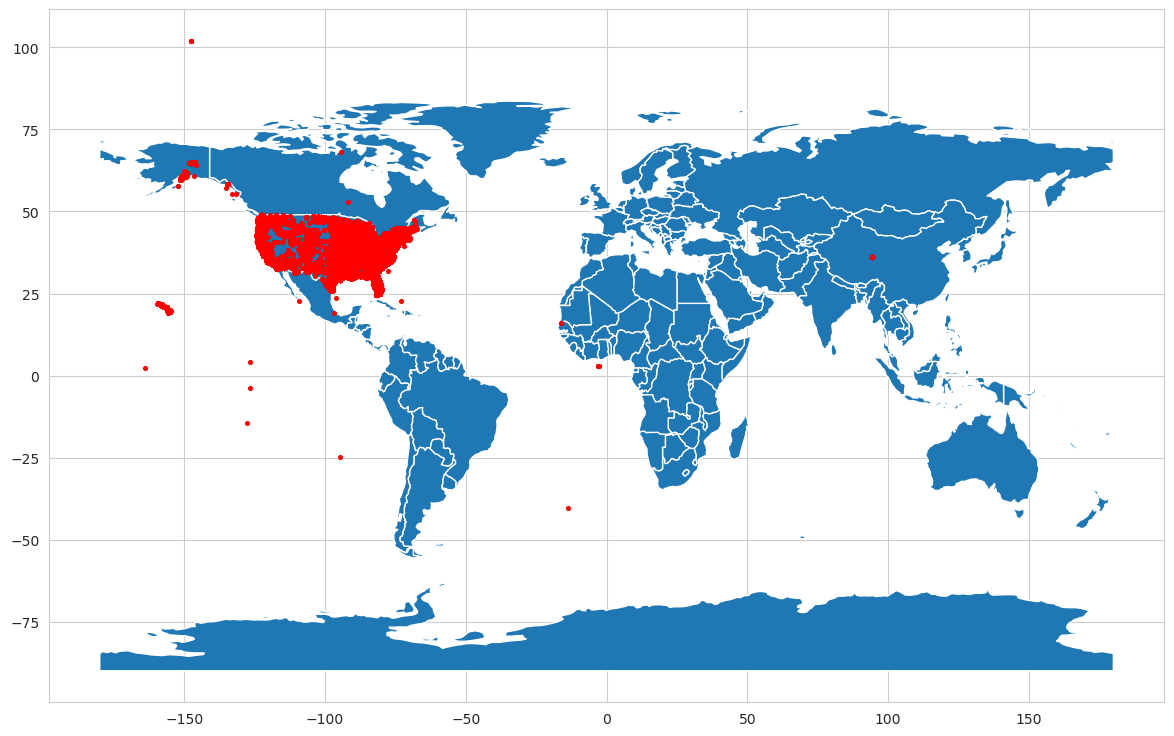

In [212]:
# geo_df.plot(column='geometry')
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geo_df.plot(ax=world.plot(figsize=(15, 9)), marker='o', color='red', markersize=7)

### Para la columna `lat`

In [213]:
Q1 = train['lat'].quantile(0.25)
Q3 = train['lat'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5 * IQR
BS = Q3 + 1.5 * IQR

print(f'Q1 de la columna `lat`: {Q1}')
print(f'Q3 de la columna `lat`: {Q3}')
print(f'El IQR de la columna `lat` es: {IQR}')
print(f'Bigote inferior de la columna` lat` es: {BI}')
print(f'Bigote superior de la columna `lat` es: {BS}')

Q1 de la columna `lat`: 33.3813
Q3 de la columna `lat`: 41.1108
El IQR de la columna `lat` es: 7.7294999999999945
Bigote inferior de la columna` lat` es: 21.78705000000001
Bigote superior de la columna `lat` es: 52.705049999999986


In [214]:
# Delete rows Price's with beds value == 0
indexLat = train[train['lat'] == 0].index
train.drop(indexLat, inplace=True)

In [215]:
Q1 = train['lat'].quantile(0.25)
Q3 = train['lat'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5 * IQR
BS = Q3 + 1.5 * IQR

print(f'Q1 de la columna `lat`: {Q1}')
print(f'Q3 de la columna `lat`: {Q3}')
print(f'El IQR de la columna `lat` es: {IQR}')
print(f'Bigote inferior de la columna` lat` es: {BI}')
print(f'Bigote superior de la columna `lat` es: {BS}')

Q1 de la columna `lat`: 33.3813
Q3 de la columna `lat`: 41.1108
El IQR de la columna `lat` es: 7.7294999999999945
Bigote inferior de la columna` lat` es: 21.78705000000001
Bigote superior de la columna `lat` es: 52.705049999999986


In [216]:
print(f'Cantidad de registros totales: {train.shape[0]}')
print(f'Cantidad de outliers en la columna `lat`: {train[(train["lat"] < BI) | (train["lat"] > BS)].shape[0]}')

Cantidad de registros totales: 300630
Cantidad de outliers en la columna `lat`: 2599


In [217]:
out_lat = (train['lat'] < BI) | (train['lat'] > BS)

In [218]:
train = train[~out_lat]

In [219]:
print(f'Cantidad de registros totales: {train.shape[0]}')
print(f'Cantidad de outliers en la columna `lat`: {train[(train["lat"] < BI) | (train["lat"] > BS)].shape[0]}')
print(f'Tamaño del dataset, luego de eliminar outliers en la columna lat: {train.shape[0]}')

Cantidad de registros totales: 298031
Cantidad de outliers en la columna `lat`: 0
Tamaño del dataset, luego de eliminar outliers en la columna lat: 298031


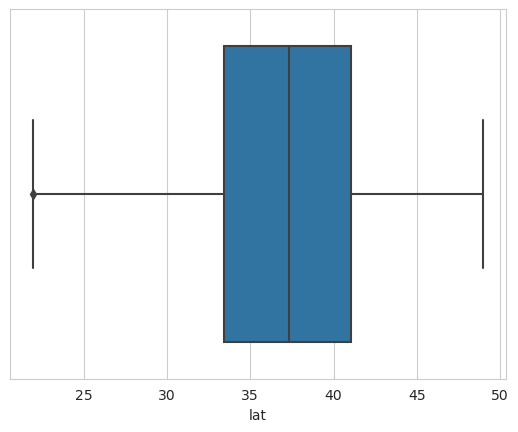

In [220]:
# Comprobamos que, haciendo una primera eliminación de outliers, la cantidad de valores extremos ahora se redujo notoriamente
sns.boxplot(x='lat', data=train)
plt.show()

### Para la columna `long`

In [221]:
Q1 = train['long'].quantile(0.25)
Q3 = train['long'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5 * IQR
BS = Q3 + 1.5 * IQR

print(f'Q1 de la columna `long`: {Q1}')
print(f'Q3 de la columna `long`: {Q3}')
print(f'El IQR de la columna `long` es: {IQR}')
print(f'Bigote inferior de la columna` long` es: {BI}')
print(f'Bigote superior de la columna `long` es: {BS}')

Q1 de la columna `long`: -97.7472
Q3 de la columna `long`: -81.1966
El IQR de la columna `long` es: 16.550600000000003
Bigote inferior de la columna` long` es: -122.57310000000001
Bigote superior de la columna `long` es: -56.3707


In [222]:
# Delete rows Price's with beds value == 0
indexLong = train[train['long'] == 0].index
train.drop(indexLong, inplace=True)

In [223]:
Q1 = train['long'].quantile(0.25)
Q3 = train['long'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5 * IQR
BS = Q3 + 1.5 * IQR

print(f'Q1 de la columna `long`: {Q1}')
print(f'Q3 de la columna `long`: {Q3}')
print(f'El IQR de la columna `long` es: {IQR}')
print(f'Bigote inferior de la columna` long` es: {BI}')
print(f'Bigote superior de la columna `long` es: {BS}')

Q1 de la columna `long`: -97.7472
Q3 de la columna `long`: -81.1966
El IQR de la columna `long` es: 16.550600000000003
Bigote inferior de la columna` long` es: -122.57310000000001
Bigote superior de la columna `long` es: -56.3707


In [224]:
print(f'Cantidad de registros totales: {train.shape[0]}')
print(f'Cantidad de outliers en la columna `long`: {train[(train["long"] < BI) | (train["long"] > BS)].shape[0]}')

Cantidad de registros totales: 298031
Cantidad de outliers en la columna `long`: 5998


In [225]:
out_long = (train['long'] < BI) | (train['long'] > BS)

In [226]:
train = train[~out_long]

In [227]:
print(f'Cantidad de registros totales: {train.shape[0]}')
print(f'Cantidad de outliers en la columna `long`: {train[(train["long"] < BI) | (train["long"] > BS)].shape[0]}')
print(f'Tamaño del dataset, luego de eliminar outliers en la columna long: {train.shape[0]}')

Cantidad de registros totales: 292033
Cantidad de outliers en la columna `long`: 0
Tamaño del dataset, luego de eliminar outliers en la columna long: 292033


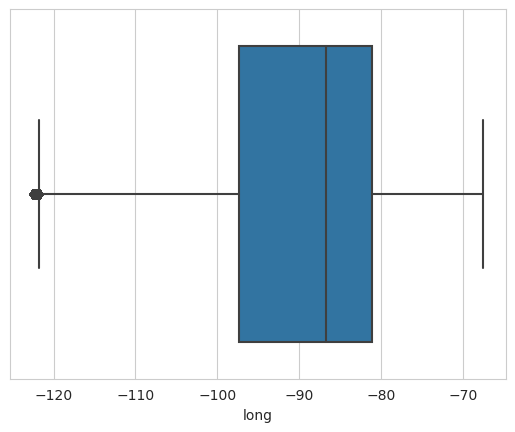

In [228]:
# Comprobamos que, haciendo una primera eliminación de outliers, la cantidad de valores extremos ahora se redujo notoriamente
sns.boxplot(x='long', data=train)
plt.show()

# Graficamos con Geopandas para verificar la correcta eliminación de los outliers en las columnas `lat` y `long`

In [229]:
geometry = [Point(xy) for xy in zip(train['long'], train['lat'])]
geometry[:3]

[<POINT (-116.225 43.585)>, <POINT (-104.78 38.914)>, <POINT (-76.164 36.792)>]

In [230]:
geo_df = gpd.GeoDataFrame(train, crs={'init': 'epsg:4326'}, geometry=geometry)

/home/osanchezd/anaconda3/envs/HENRY/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [231]:
geo_df.head()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,category_price,geometry
0,1350,1200,2,2.0,1,1,1,0,0,0,w/d in unit,detached garage,43.5851,-116.2250,medium,POINT (-116.22500 43.58510)
1,1115,694,1,1.0,1,1,1,0,0,0,w/d in unit,carport,38.9137,-104.7800,medium,POINT (-104.78000 38.91370)
2,1129,900,2,2.0,0,0,1,0,0,0,w/d hookups,off-street parking,36.7922,-76.1643,medium,POINT (-76.16430 36.79220)
3,1580,1469,3,2.0,1,1,1,0,0,0,w/d in unit,off-street parking,33.5623,-112.0560,medium,POINT (-112.05600 33.56230)
4,995,700,1,1.0,1,1,1,0,0,0,w/d in unit,carport,36.0595,-86.6592,low,POINT (-86.65920 36.05950)


<AxesSubplot:>

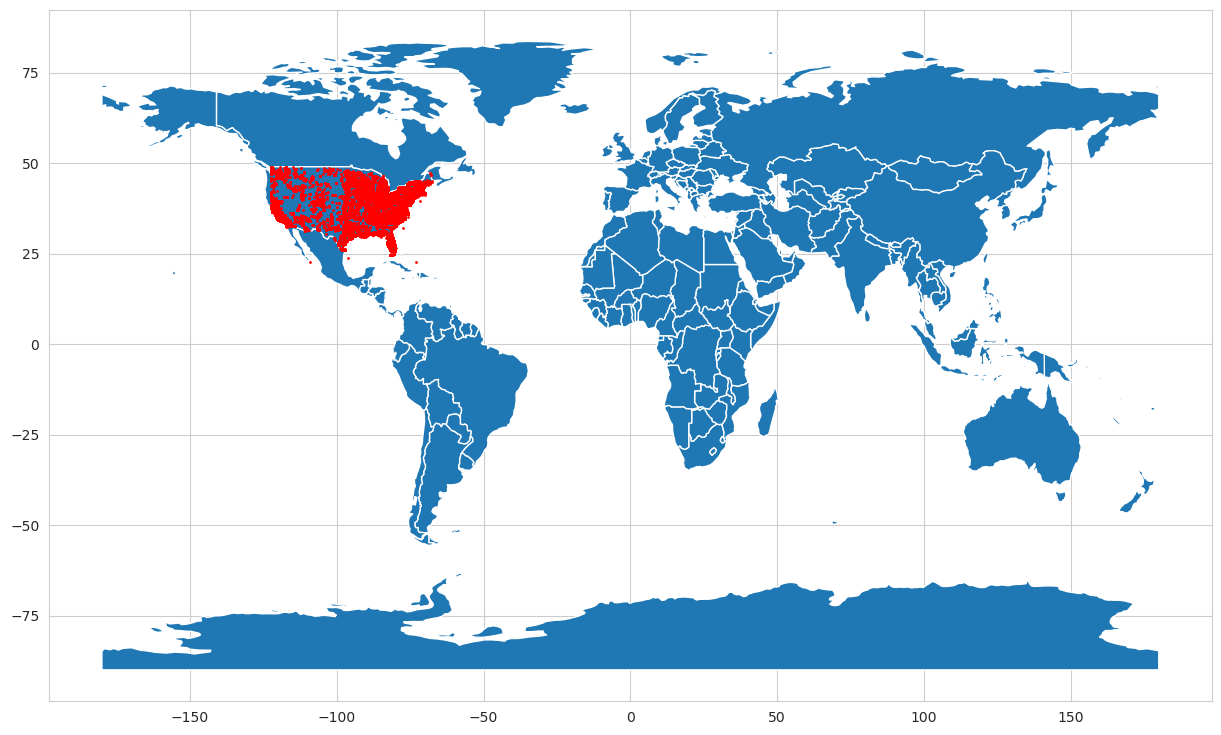

In [232]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geo_df.plot(ax=world.plot(figsize=(15, 9)), marker='o', color='red', markersize=1)

# Fase de transformación

`Escalado/Normalización`

In [233]:
# Eliminamos las columnas `price` y `geometry`. Para el siguiente paso, ya no nos son de utilidad.
train.drop(columns=['price', 'geometry'], inplace=True)

In [234]:
# Comprobamos la correcta eliminación
train.head()

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,category_price
0,1200,2,2.0,1,1,1,0,0,0,w/d in unit,detached garage,43.5851,-116.2250,medium
1,694,1,1.0,1,1,1,0,0,0,w/d in unit,carport,38.9137,-104.7800,medium
2,900,2,2.0,0,0,1,0,0,0,w/d hookups,off-street parking,36.7922,-76.1643,medium
3,1469,3,2.0,1,1,1,0,0,0,w/d in unit,off-street parking,33.5623,-112.0560,medium
4,700,1,1.0,1,1,1,0,0,0,w/d in unit,carport,36.0595,-86.6592,low


In [237]:
for i in train.columns:
    if train[i].dtype != 'object':
        print(i)

sqfeet
beds
baths
cats_allowed
dogs_allowed
smoking_allowed
wheelchair_access
electric_vehicle_charge
comes_furnished
lat
long
category_price


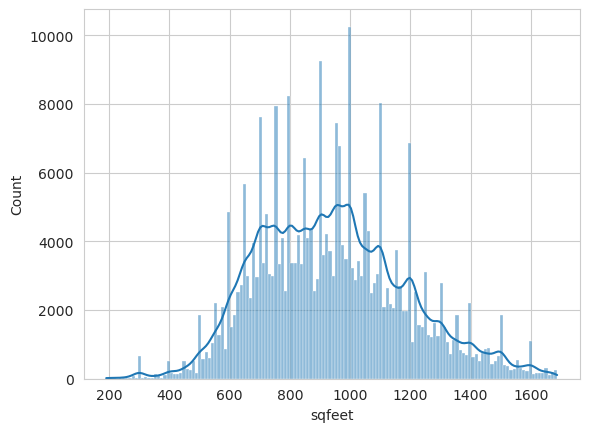

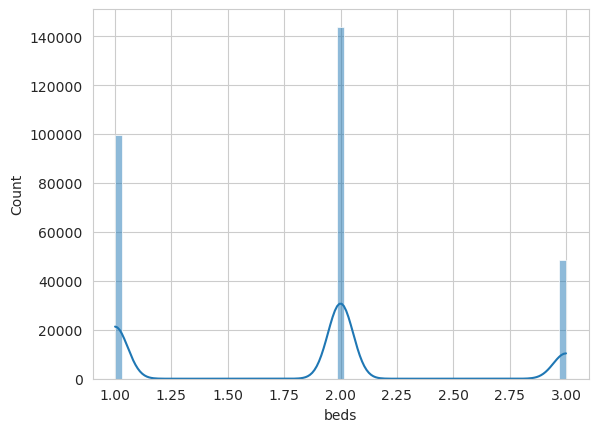

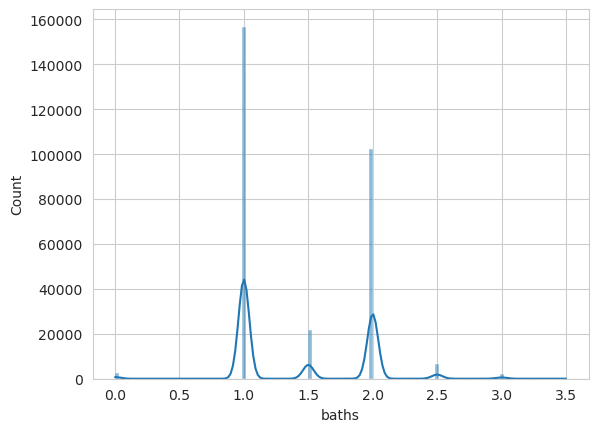

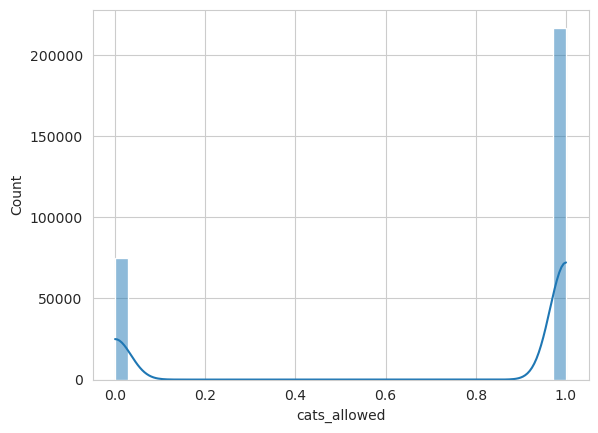

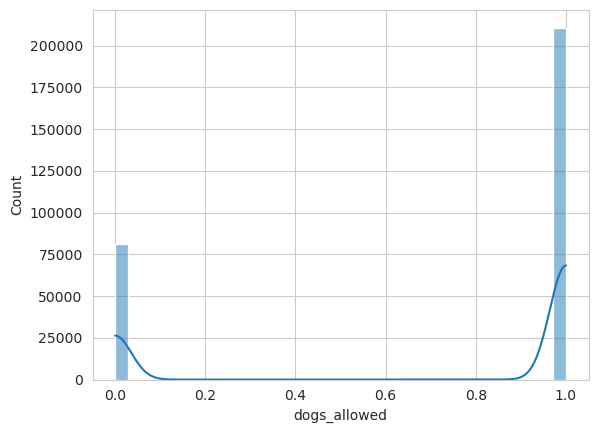

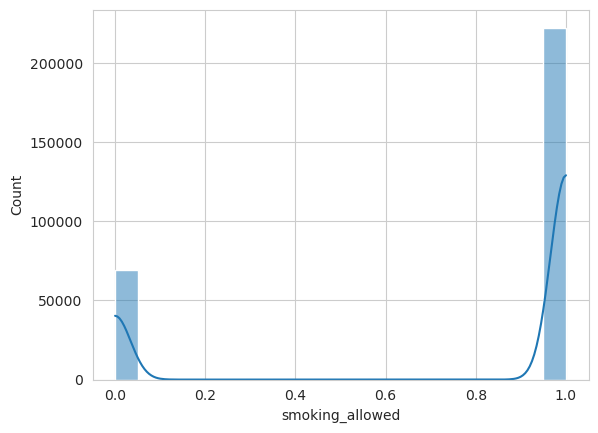

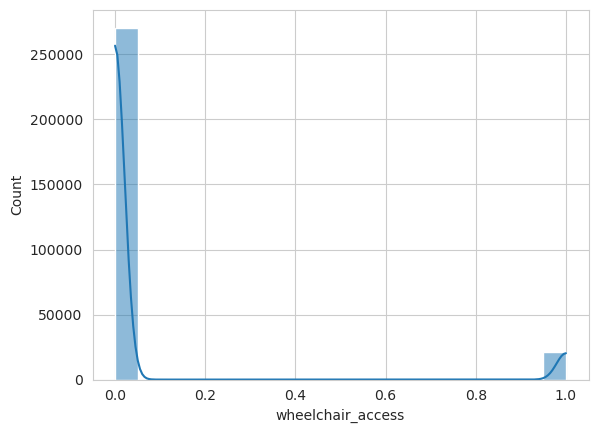

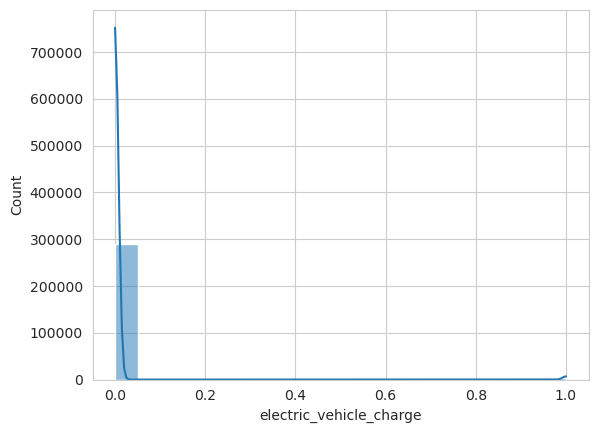

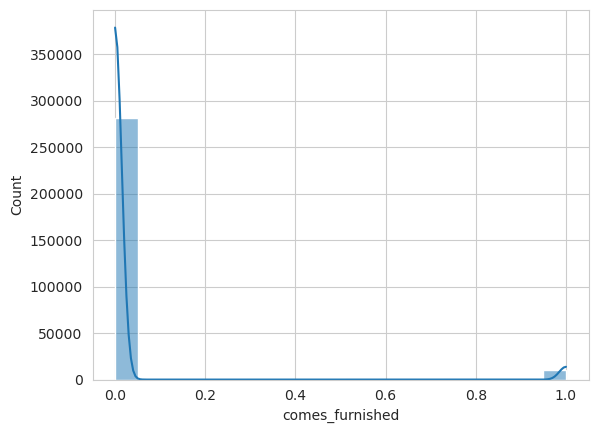

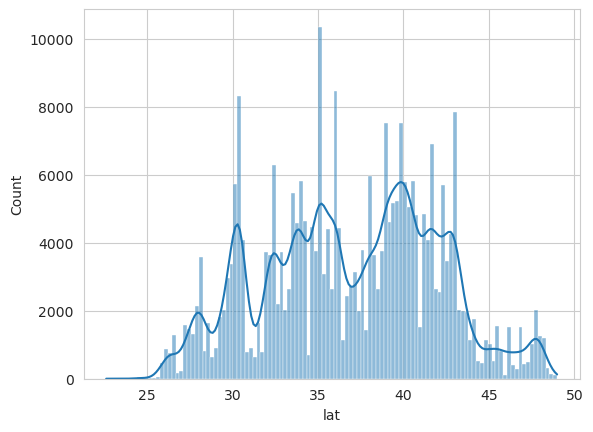

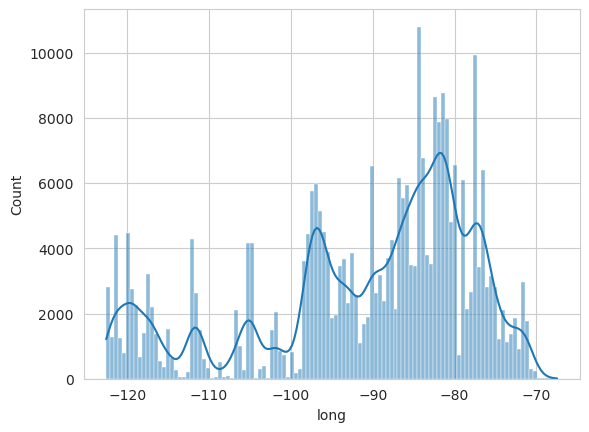

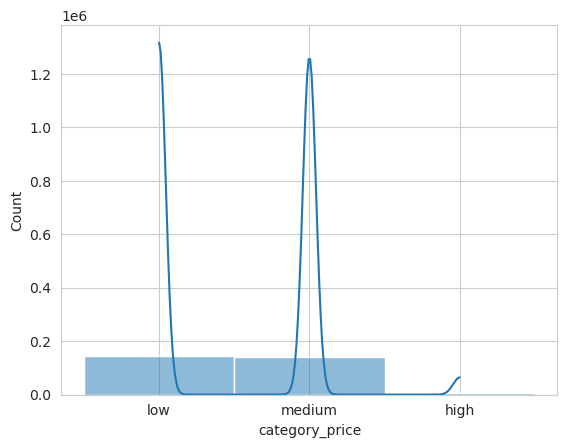

In [239]:
# Observamos la distribución de nuestros datos para decidir, cuál técnica de escalado/normalización utilizar
fc.plot_data_hist(train)

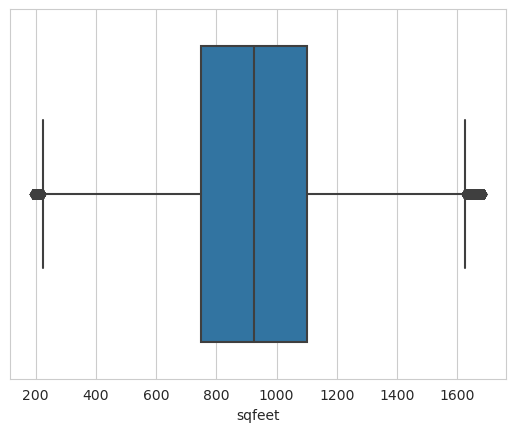

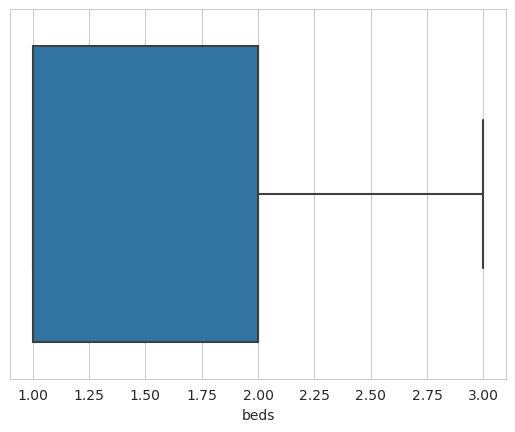

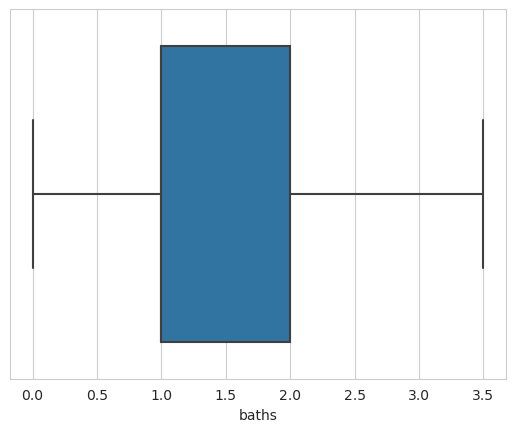

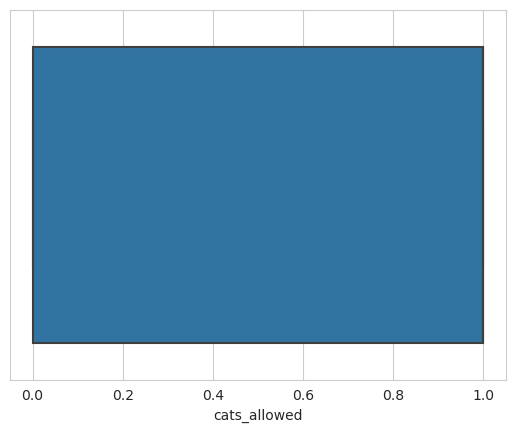

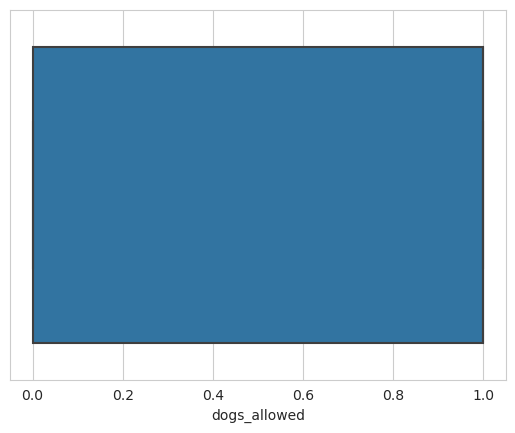

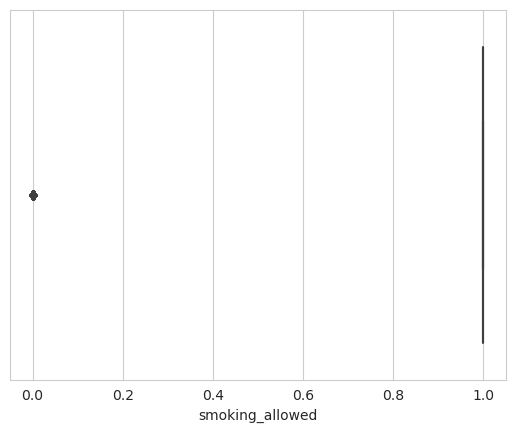

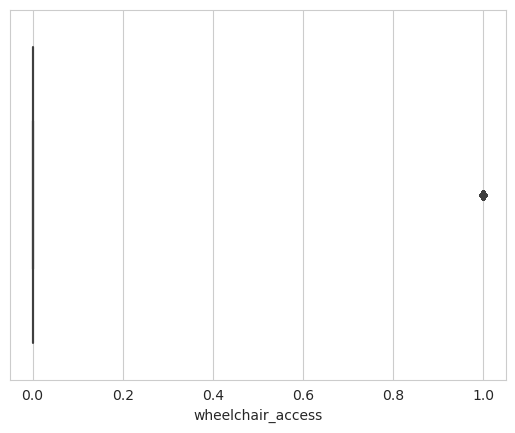

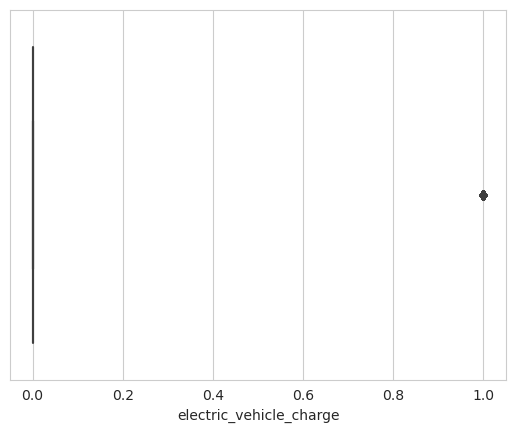

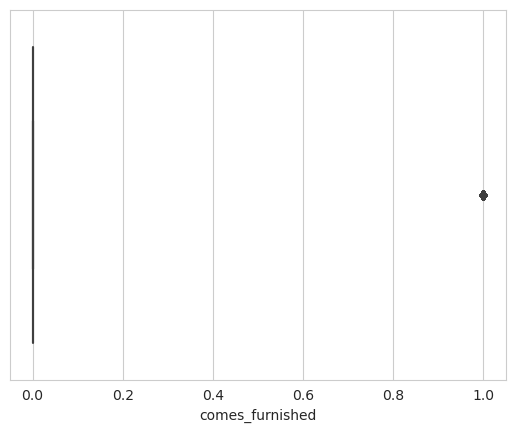

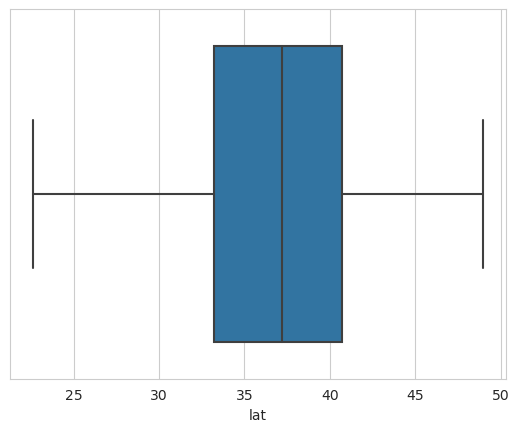

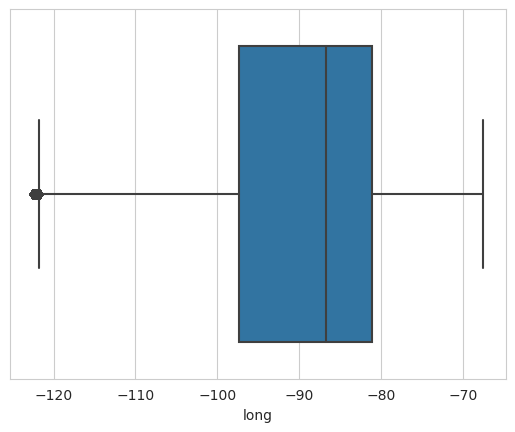

TypeError: Horizontal orientation requires numeric `x` variable.

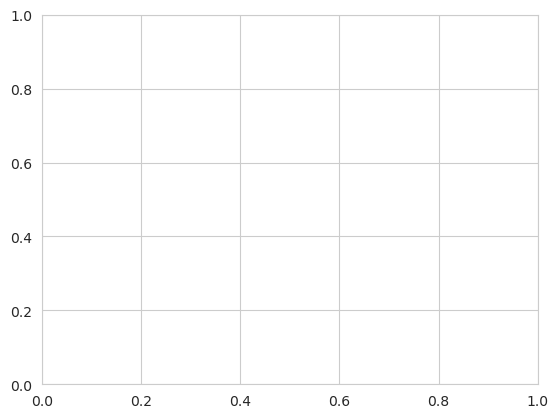

In [240]:
fc.plot_data_box(train)

# Standard Scaler
Hacemos uso de esta técnica, para obtener un valor medio de 0 y una desviación estándar de 1.

In [241]:
from sklearn.preprocessing import StandardScaler

In [242]:
# Creamos una copia de nuestro dataframe al momento, para trabajar de manera segura
train_norm = train.copy()

In [243]:
# Creamos una copia de nuestro dataframe al momento, para trabajar de manera segura
prediction_norm = prediction.copy()

In [244]:
for i in train_norm.columns:
    if train_norm[i].dtype != 'object':
        print(i)

sqfeet
beds
baths
cats_allowed
dogs_allowed
smoking_allowed
wheelchair_access
electric_vehicle_charge
comes_furnished
lat
long
category_price


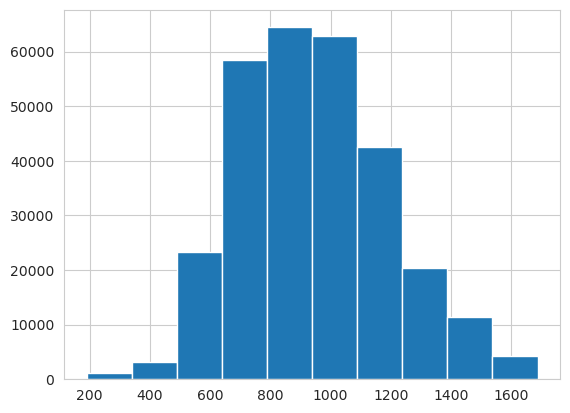

In [245]:
# A excepción de la variable `category_price`, trabajaremos el resto de las variables arriba impresas
# Recordemos la distribución de la variable `sqfeet`
plt.hist(train_norm['sqfeet'])
plt.show()

In [246]:
# Escalamos la variable `sqfeet`
scaler = StandardScaler()
scaler.fit(train_norm[['sqfeet']])
train_norm['sqfeet'] = scaler.transform(train_norm[['sqfeet']])

In [247]:
# Para el test de predicción
# Escalamos la variable `sqfeet`
scaler = StandardScaler()
scaler.fit(prediction_norm[['sqfeet']])
prediction_norm['sqfeet'] = scaler.transform(prediction_norm[['sqfeet']])

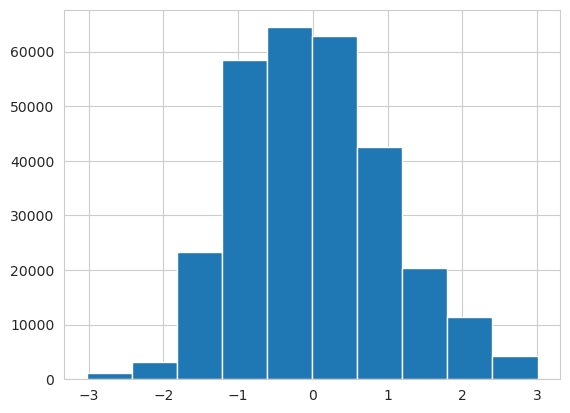

In [248]:
# Observamos como quedó la distribución después de escalar
plt.hist(train_norm['sqfeet'])
plt.show()

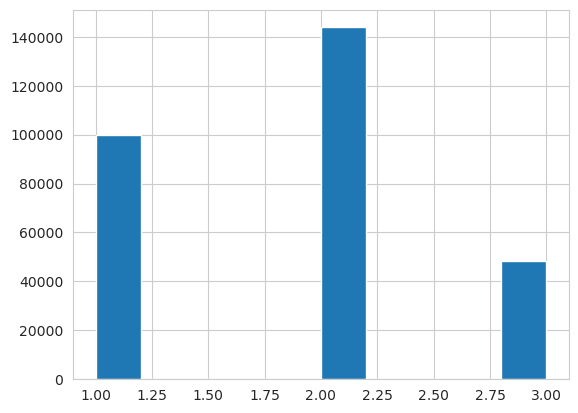

In [249]:
# Recordemos la distribución de la variable `beds`
plt.hist(train_norm['beds'])
plt.show()

In [250]:
# Escalamos la variable `beds`
scaler = StandardScaler()
scaler.fit(train_norm[['beds']])
train_norm['beds'] = scaler.transform(train_norm[['beds']])

In [251]:
# Para predicción
# Escalamos la variable `beds`
scaler = StandardScaler()
scaler.fit(prediction_norm[['beds']])
prediction_norm['beds'] = scaler.transform(prediction_norm[['beds']])

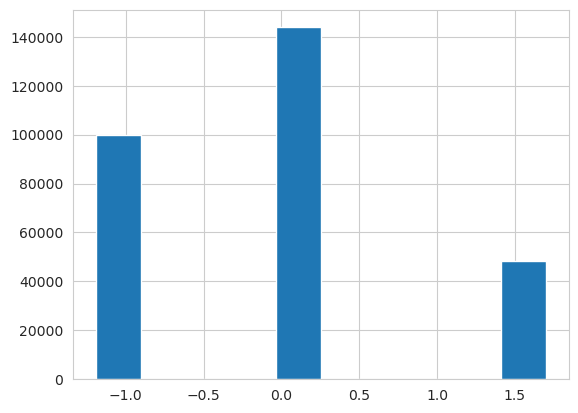

In [252]:
# Observamos como quedó la distribución después de escalar
plt.hist(train_norm['beds'])
plt.show()

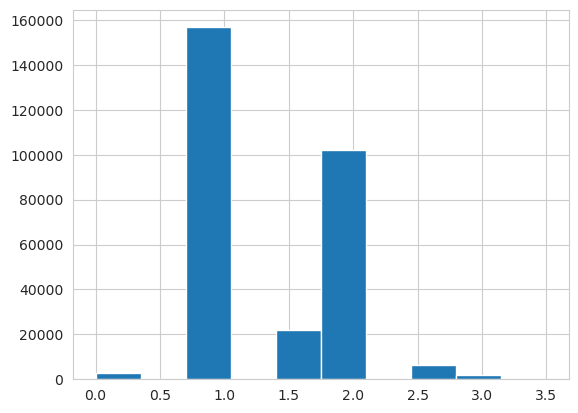

In [253]:
# Recordemos la distribución de la variable `baths`
plt.hist(train_norm['baths'])
plt.show()

In [254]:
# Escalamos la variable `baths`
scaler = StandardScaler()
scaler.fit(train_norm[['baths']])
train_norm['baths'] = scaler.transform(train_norm[['baths']])

In [255]:
# Para predicción
# Escalamos la variable `baths`
scaler = StandardScaler()
scaler.fit(prediction_norm[['baths']])
prediction_norm['baths'] = scaler.transform(prediction_norm[['baths']])

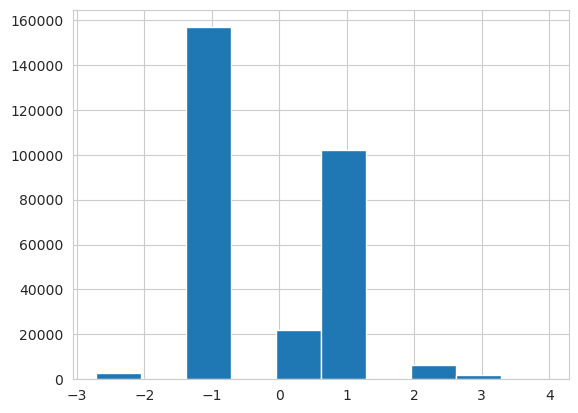

In [256]:
# Observamos como quedó la distribución después de escalar
plt.hist(train_norm['baths'])
plt.show()

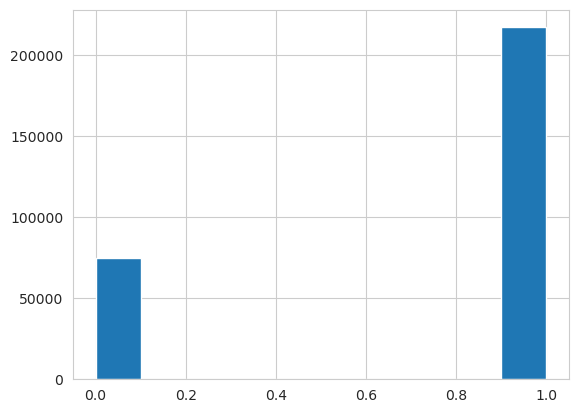

In [257]:
# Recordemos la distribución de la variable `cats_allowed`
plt.hist(train_norm['cats_allowed'])
plt.show()

In [258]:
# Escalamos la variable `cats_allowed`
scaler = StandardScaler()
scaler.fit(train_norm[['cats_allowed']])
train_norm['cats_allowed'] = scaler.transform(train_norm[['cats_allowed']])

In [259]:
# Para predicción
# Escalamos la variable `cats_allowed`
scaler = StandardScaler()
scaler.fit(prediction_norm[['cats_allowed']])
prediction_norm['cats_allowed'] = scaler.transform(prediction_norm[['cats_allowed']])

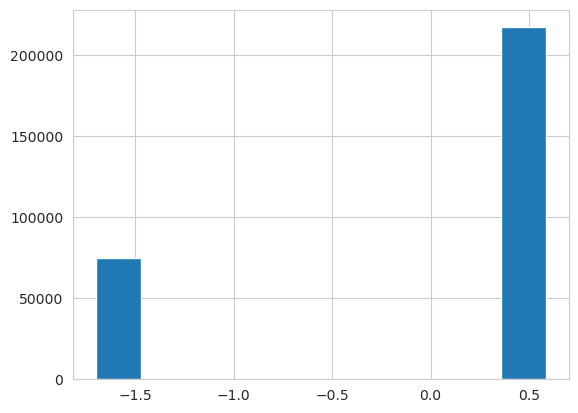

In [260]:
# Observamos como quedó la distribución después de escalar
plt.hist(train_norm['cats_allowed'])
plt.show()

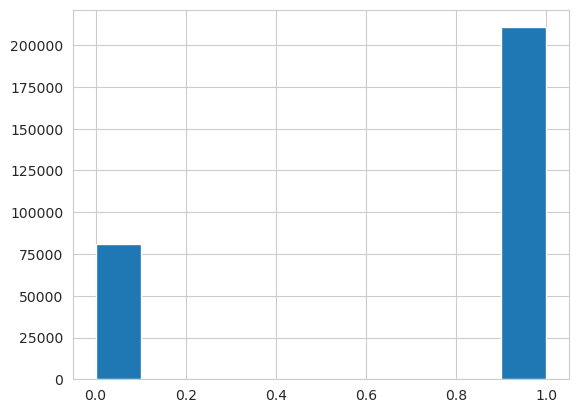

In [261]:
# Recordemos la distribución de la variable `dogs_allowed`
plt.hist(train_norm['dogs_allowed'])
plt.show()

In [262]:
# Escalamos la variable `dogs_allowed`
scaler = StandardScaler()
scaler.fit(train_norm[['dogs_allowed']])
train_norm['dogs_allowed'] = scaler.transform(train_norm[['dogs_allowed']])

In [263]:
# Para predicción
# Escalamos la variable `dogs_allowed`
scaler = StandardScaler()
scaler.fit(prediction_norm[['dogs_allowed']])
prediction_norm['dogs_allowed'] = scaler.transform(prediction_norm[['dogs_allowed']])

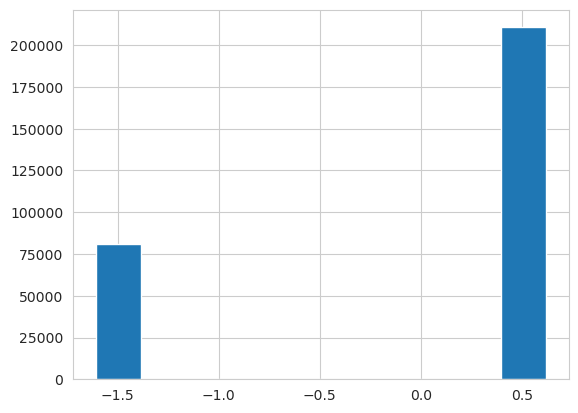

In [264]:
# Observamos como quedó la distribución después de escalar
plt.hist(train_norm['dogs_allowed'])
plt.show()

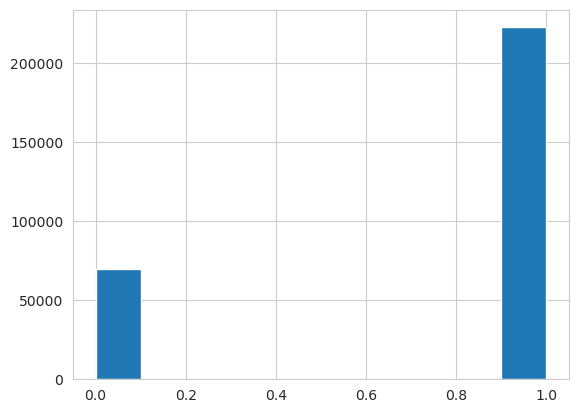

In [265]:
# Recordemos la distribución de la variable `smoking_allowed`
plt.hist(train_norm['smoking_allowed'])
plt.show()

In [266]:
# Escalamos la variable `smoking_allowed`
scaler = StandardScaler()
scaler.fit(train_norm[['smoking_allowed']])
train_norm['smoking_allowed'] = scaler.transform(train_norm[['smoking_allowed']])

In [267]:
# Para predicción
# Escalamos la variable `smoking_allowed`
scaler = StandardScaler()
scaler.fit(prediction_norm[['smoking_allowed']])
prediction_norm['smoking_allowed'] = scaler.transform(prediction_norm[['smoking_allowed']])

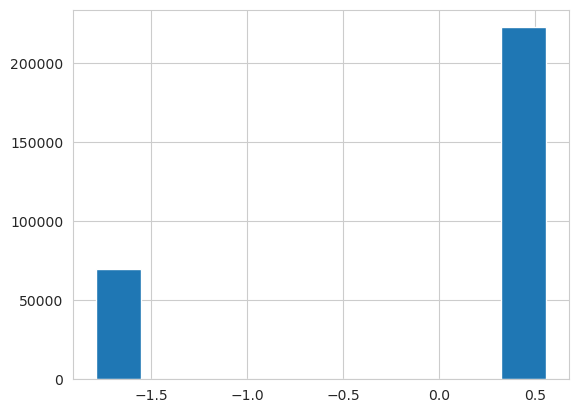

In [268]:
# Observamos como quedó la distribución después de escalar
plt.hist(train_norm['smoking_allowed'])
plt.show()

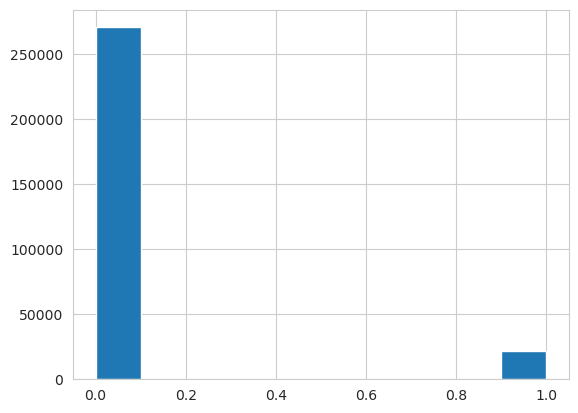

In [269]:
# Recordemos la distribución de la variable `wheelchair_access`
plt.hist(train_norm['wheelchair_access'])
plt.show()

In [270]:
# Escalamos la variable `wheelchair_access`
scaler = StandardScaler()
scaler.fit(train_norm[['wheelchair_access']])
train_norm['wheelchair_access'] = scaler.transform(train_norm[['wheelchair_access']])

In [271]:
# Para predicción
# Escalamos la variable `wheelchair_access`
scaler = StandardScaler()
scaler.fit(prediction_norm[['wheelchair_access']])
prediction_norm['wheelchair_access'] = scaler.transform(prediction_norm[['wheelchair_access']])

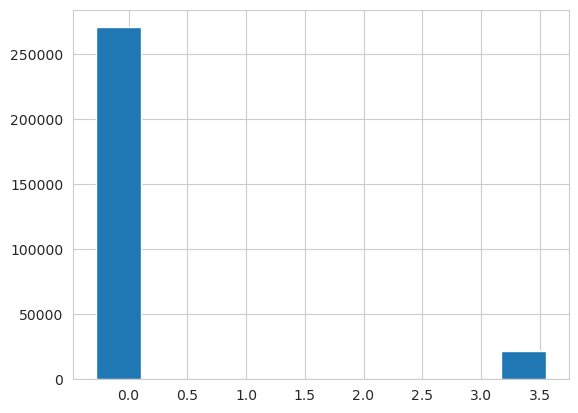

In [272]:
# Observamos como quedó la distribución después de escalar
plt.hist(train_norm['wheelchair_access'])
plt.show()

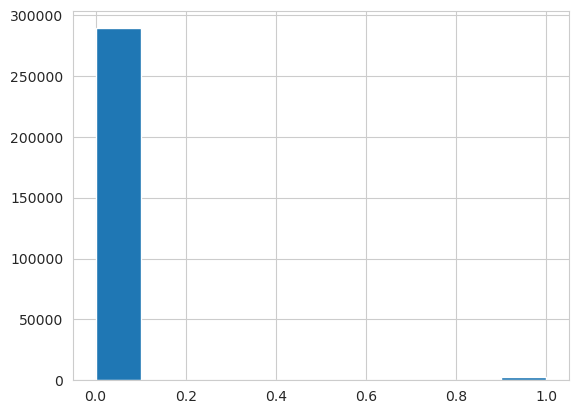

In [273]:
# Recordemos la distribución de la variable `electric_vehicle_charge`
plt.hist(train_norm['electric_vehicle_charge'])
plt.show()

In [274]:
# Escalamos la variable `electric_vehicle_charge`
scaler = StandardScaler()
scaler.fit(train_norm[['electric_vehicle_charge']])
train_norm['electric_vehicle_charge'] = scaler.transform(train_norm[['electric_vehicle_charge']])

In [275]:
# Para predicción
# Escalamos la variable `electric_vehicle_charge`
scaler = StandardScaler()
scaler.fit(prediction_norm[['electric_vehicle_charge']])
prediction_norm['electric_vehicle_charge'] = scaler.transform(prediction_norm[['electric_vehicle_charge']])

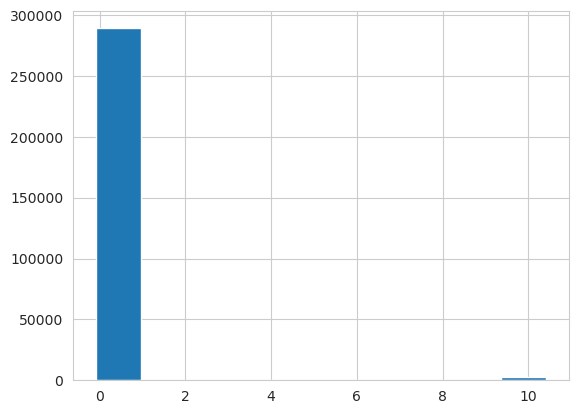

In [276]:
# Observamos como quedó la distribución después de escalar
plt.hist(train_norm['electric_vehicle_charge'])
plt.show()

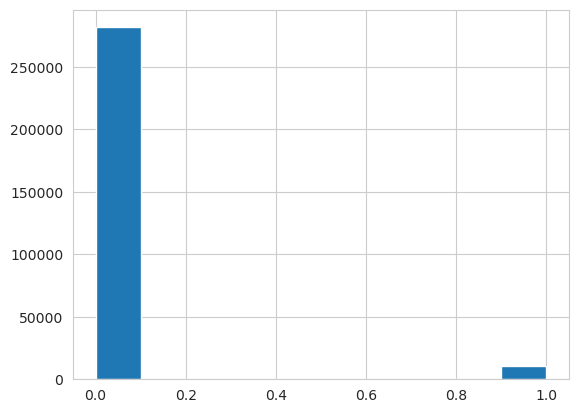

In [277]:
# Recordemos la distribución de la variable `comes_furnished`
plt.hist(train_norm['comes_furnished'])
plt.show()

In [278]:
# Escalamos la variable `comes_furnished`
scaler = StandardScaler()
scaler.fit(train_norm[['comes_furnished']])
train_norm['comes_furnished'] = scaler.transform(train_norm[['comes_furnished']])

In [279]:
# Para predicción
# Escalamos la variable `comes_furnished`
scaler = StandardScaler()
scaler.fit(prediction_norm[['comes_furnished']])
prediction_norm['comes_furnished'] = scaler.transform(prediction_norm[['comes_furnished']])

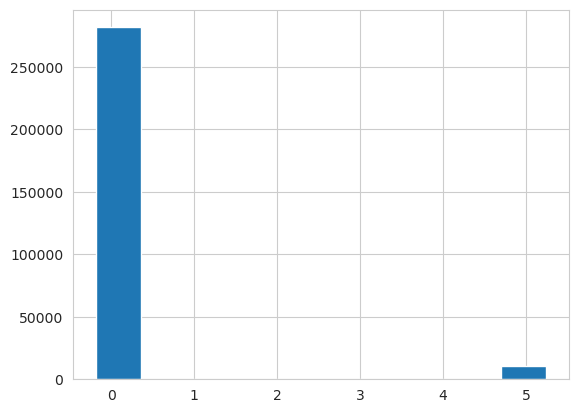

In [280]:
# Observamos como quedó la distribución después de escalar
plt.hist(train_norm['comes_furnished'])
plt.show()

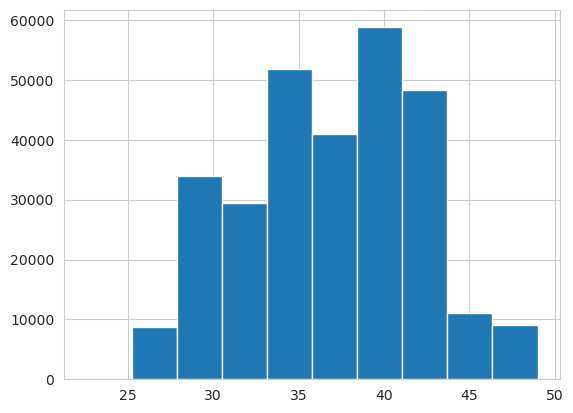

In [281]:
# Recordemos la distribución de la variable `lat`
plt.hist(train_norm['lat'])
plt.show()

In [282]:
# Escalamos la variable `lat`
scaler = StandardScaler()
scaler.fit(train_norm[['lat']])
train_norm['lat'] = scaler.transform(train_norm[['lat']])

In [283]:
# Para predicción
# Escalamos la variable `lat`
scaler = StandardScaler()
scaler.fit(prediction_norm[['lat']])
prediction_norm['lat'] = scaler.transform(prediction_norm[['lat']])

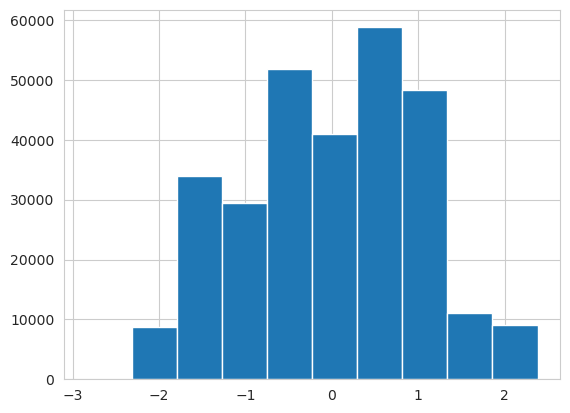

In [284]:
# Observamos como quedó la distribución después de escalar
plt.hist(train_norm['lat'])
plt.show()

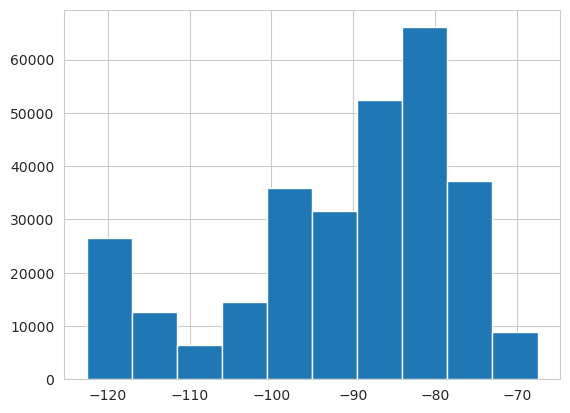

In [285]:
# Recordemos la distribución de la variable `long`
plt.hist(train_norm['long'])
plt.show()

In [286]:
# Escalamos la variable `long`
scaler = StandardScaler()
scaler.fit(train_norm[['long']])
train_norm['long'] = scaler.transform(train_norm[['long']])

In [287]:
# Para predicción
# Escalamos la variable `long`
scaler = StandardScaler()
scaler.fit(prediction_norm[['long']])
prediction_norm['long'] = scaler.transform(prediction_norm[['long']])

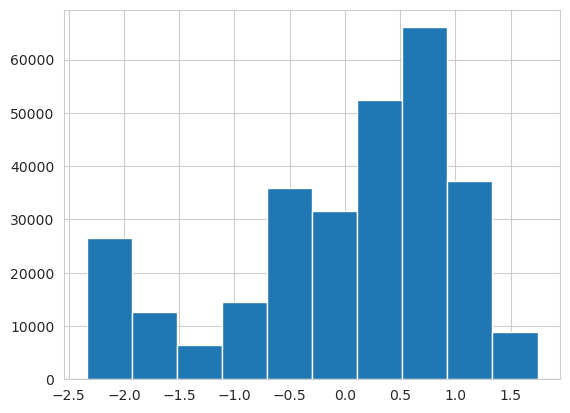

In [288]:
# Observamos como quedó la distribución después de escalar
plt.hist(train_norm['long'])
plt.show()

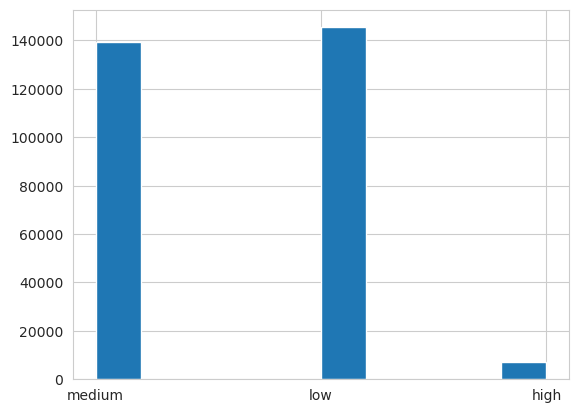

In [289]:
# Recordemos la distribución de la variable `category_price`
plt.hist(train_norm['category_price'])
plt.show()

# Fase de transformación

`Codificación de variables categóricas`

In [290]:
for i in train_norm.columns:
    if train_norm[i].dtype == 'object':
        print(i)

laundry_options
parking_options


In [291]:
for i in prediction.columns:
    if prediction[i].dtype == 'object':
        print(i)

laundry_options
parking_options


## **Veamos la aplicación de One Hot Encoder para la codificación de nuestras variables categóricas.**

In [357]:
# Creamos una copia del dataset para transformar de manera segura
train_norm_2 = train_norm.copy()

In [293]:
# Creamos una copia del dataset para transformar de manera segura
prediction_norm_2 = prediction_norm.copy()

In [294]:
from sklearn.preprocessing import OneHotEncoder

In [358]:
# Codificación de la variable `laundry_options`
laundry_encoded = train_norm_2[['laundry_options']]
ohe = OneHotEncoder(handle_unknown='ignore')
laundry_encoded = pd.DataFrame(ohe.fit_transform(laundry_encoded).toarray())

for i in laundry_encoded.columns:
    laundry_encoded.rename(columns={i: 'laundry_' + str(i)}, inplace=True)

# Incorporamos el dataframe codificado al dataframe original
train_norm_2 = train_norm_2.join(laundry_encoded)

In [296]:
# Para predicción
# Codificación de la variable `laundry_options`
laundry_encoded = prediction_norm_2[['laundry_options']]
ohe = OneHotEncoder(handle_unknown='ignore')
laundry_encoded = pd.DataFrame(ohe.fit_transform(laundry_encoded).toarray())

for i in laundry_encoded.columns:
    laundry_encoded.rename(columns={i: 'laundry_' + str(i)}, inplace=True)

# Incorporamos el dataframe codificado al dataframe original
prediction_norm_2 = prediction_norm_2.join(laundry_encoded)

In [359]:
# Codificación de la variable `parking_options`
parking_encoded = train_norm_2[['parking_options']]
ohe = OneHotEncoder(handle_unknown='ignore')
parking_encoded = pd.DataFrame(ohe.fit_transform(parking_encoded).toarray())

for i in parking_encoded.columns:
    parking_encoded.rename(columns={i: 'parking_' + str(i)}, inplace=True)

# Incorporamos el dataframe codificado al dataframe original
train_norm_2 = train_norm_2.join(parking_encoded)

In [298]:
# Para predicción
# Codificación de la variable `parking_options`
parking_encoded = prediction_norm_2[['parking_options']]
ohe = OneHotEncoder(handle_unknown='ignore')
parking_encoded = pd.DataFrame(ohe.fit_transform(parking_encoded).toarray())

for i in parking_encoded.columns:
    parking_encoded.rename(columns={i: 'parking_' + str(i)}, inplace=True)

# Incorporamos el dataframe codificado al dataframe original
prediction_norm_2 = prediction_norm_2.join(parking_encoded)

In [299]:
train_norm_2.head()

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,...,laundry_2,laundry_3,laundry_4,parking_0,parking_1,parking_2,parking_3,parking_4,parking_5,parking_6
0,1.044509,0.254060,1.095235,0.588078,0.621056,0.558792,-0.281158,-0.095931,-0.190704,w/d in unit,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.995177,-1.194502,-0.813363,0.588078,0.621056,0.558792,-0.281158,-0.095931,-0.190704,w/d in unit,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.164791,0.254060,1.095235,-1.700454,-1.610160,0.558792,-0.281158,-0.095931,-0.190704,w/d hookups,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.128848,1.702622,1.095235,0.588078,0.621056,0.558792,-0.281158,-0.095931,-0.190704,w/d in unit,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.970991,-1.194502,-0.813363,0.588078,0.621056,0.558792,-0.281158,-0.095931,-0.190704,w/d in unit,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [300]:
prediction_norm_2.head()

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,...,laundry_2,laundry_3,laundry_4,parking_0,parking_1,parking_2,parking_3,parking_4,parking_5,parking_6
0,0.497780,0.189793,0.736728,-1.634647,-1.558739,0.604980,-0.301605,-0.117355,-0.22455,w/d in unit,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.069785,0.013283,-0.691397,-1.634647,-1.558739,0.604980,-0.301605,-0.117355,-0.22455,w/d hookups,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.215361,0.013283,0.736728,0.611753,0.641544,0.604980,3.315591,-0.117355,-0.22455,w/d in unit,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.404611,0.013283,1.450791,0.611753,0.641544,-1.652947,-0.301605,-0.117355,-0.22455,w/d in unit,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.318904,0.013283,-0.691397,0.611753,0.641544,0.604980,-0.301605,-0.117355,-0.22455,laundry on site,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Eliminamos nuestras variables categóricas, después de haberlas codificado

`laundry_options`
`parking_options`


In [301]:
columns_to_drop_2 = ['laundry_options', 'parking_options']

In [360]:
train_norm_2.drop(columns=columns_to_drop_2, inplace=True)

In [303]:
prediction_norm_2.drop(columns=columns_to_drop_2, inplace=True)

In [310]:
train_norm_2.head()

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,...,laundry_2,laundry_3,laundry_4,parking_0,parking_1,parking_2,parking_3,parking_4,parking_5,parking_6
0,1.044509,0.254060,1.095235,0.588078,0.621056,0.558792,-0.281158,-0.095931,-0.190704,1.310690,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.995177,-1.194502,-0.813363,0.588078,0.621056,0.558792,-0.281158,-0.095931,-0.190704,0.387372,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.164791,0.254060,1.095235,-1.700454,-1.610160,0.558792,-0.281158,-0.095931,-0.190704,-0.031950,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.128848,1.702622,1.095235,0.588078,0.621056,0.558792,-0.281158,-0.095931,-0.190704,-0.670350,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.970991,-1.194502,-0.813363,0.588078,0.621056,0.558792,-0.281158,-0.095931,-0.190704,-0.176770,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [305]:
prediction_norm_2.head()

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,...,laundry_2,laundry_3,laundry_4,parking_0,parking_1,parking_2,parking_3,parking_4,parking_5,parking_6
0,0.497780,0.189793,0.736728,-1.634647,-1.558739,0.604980,-0.301605,-0.117355,-0.22455,0.966991,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.069785,0.013283,-0.691397,-1.634647,-1.558739,0.604980,-0.301605,-0.117355,-0.22455,1.223145,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.215361,0.013283,0.736728,0.611753,0.641544,0.604980,3.315591,-0.117355,-0.22455,0.915232,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.404611,0.013283,1.450791,0.611753,0.641544,-1.652947,-0.301605,-0.117355,-0.22455,0.605679,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.318904,0.013283,-0.691397,0.611753,0.641544,0.604980,-0.301605,-0.117355,-0.22455,0.158138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Revisando existencia de valores nulos

In [361]:
print(train_norm_2.isna().sum())

sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
lat                            0
long                           0
category_price                 0
laundry_0                  45826
laundry_1                  45826
laundry_2                  45826
laundry_3                  45826
laundry_4                  45826
parking_0                  45826
parking_1                  45826
parking_2                  45826
parking_3                  45826
parking_4                  45826
parking_5                  45826
parking_6                  45826
dtype: int64


In [311]:
train_norm_2.shape

(292033, 24)

In [362]:
# Eliminamos los valores nulos
train_norm_2.dropna(inplace=True)

In [397]:
# Guardamos nuestra columna target en la variable y
y = train_norm_2['category_price']

In [398]:
y.head()

0    medium
1    medium
2    medium
3    medium
4       low
Name: category_price, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [399]:
y.value_counts()

low       122505
medium    117725
high        5977
Name: category_price, dtype: int64

In [400]:
# Eliminamos la columna target de nuestro training test para el correcto entrenamiento del modelo
train_norm_2.drop(columns='category_price', inplace=True)

In [401]:
train_norm_2.head()

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,...,laundry_2,laundry_3,laundry_4,parking_0,parking_1,parking_2,parking_3,parking_4,parking_5,parking_6
0,1.044509,0.254060,1.095235,0.588078,0.621056,0.558792,-0.281158,-0.095931,-0.190704,1.310690,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.995177,-1.194502,-0.813363,0.588078,0.621056,0.558792,-0.281158,-0.095931,-0.190704,0.387372,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.164791,0.254060,1.095235,-1.700454,-1.610160,0.558792,-0.281158,-0.095931,-0.190704,-0.031950,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.128848,1.702622,1.095235,0.588078,0.621056,0.558792,-0.281158,-0.095931,-0.190704,-0.670350,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.970991,-1.194502,-0.813363,0.588078,0.621056,0.558792,-0.281158,-0.095931,-0.190704,-0.176770,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Veamos la aplicación de Label Encoder para nuestra variable target `category_price`

In [402]:
from sklearn import preprocessing

In [403]:
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

In [404]:
print(y)

[2 2 2 ... 2 1 1]


In [405]:
train_norm_2.shape

(246207, 23)

In [406]:
y.shape

(246207,)

In [407]:
type(y)

numpy.ndarray

In [408]:
y_df = pd.DataFrame(y)

In [409]:
y_df.value_counts()

1    122505
2    117725
0      5977
dtype: int64

In [410]:
type(y_df)

pandas.core.frame.DataFrame

In [411]:
y_df.shape

(246207, 1)

El siguiente paso es muy importante, como solo nos interesa predecir el valor de "1", es decir, aquellas propiedades con valor low_price, los valores de "0" y "2", que representan high_price y medium_price, los procedemos a agrupar para que en nuestra columna de datos, solo estén presentes 0's y 1's, y asi, efectuar una clasificación binaria.

In [412]:
y_df.replace(int(2), int(0), inplace=True)

In [414]:
y = y_df.copy()

## Separando los datos en Train y Test set

In [415]:
from sklearn.model_selection import train_test_split

In [416]:
X = train_norm_2.copy()
# X = train_norm_2.drop(columns='category_price')

In [417]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023, stratify=y)

In [418]:
print(f'Proporción de etiquetas en los datos de Train: {y_train.sum()/y_train.size}')
print(f'Proporción de etiquetas en los datos de Test: {y_test.sum()/y_test.size}')

Proporción de etiquetas en los datos de Train: 0    0.497571
dtype: float64
Proporción de etiquetas en los datos de Test: 0    0.497563
dtype: float64


In [457]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from sklearn.svm import SVC

# SVM

In [420]:
clf_svm = SVC(random_state=2023)

In [421]:
# 5 min fitting
clf_svm.fit(X_train, y_train)

/home/osanchezd/anaconda3/envs/HENRY/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=2023)

In [422]:
# 15 min Train predicting
y_pred_svm_train = clf_svm.predict(X_train)

In [423]:
# min Test predicting
y_pred_svm_test = clf_svm.predict(X_test)

In [ ]:
# print(f'Recall for Train: {recall_score(y_train, y_pred_svm_train)}')
# print(f'Recall for Test: {recall_score(y_train, y_pred_svm_test)}')

In [424]:
print(classification_report(y_train, y_pred_svm_train))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     98961
           1       0.77      0.79      0.78     98004

    accuracy                           0.78    196965
   macro avg       0.78      0.78      0.78    196965
weighted avg       0.78      0.78      0.78    196965



In [425]:
print(classification_report(y_test, y_pred_svm_test))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78     24741
           1       0.77      0.78      0.78     24501

    accuracy                           0.78     49242
   macro avg       0.78      0.78      0.78     49242
weighted avg       0.78      0.78      0.78     49242



In [426]:
confusion_matrix(y_train, y_pred_svm_train)

array([[76434, 22527],
       [20912, 77092]])

In [427]:
confusion_matrix(y_test, y_pred_svm_test)

array([[19084,  5657],
       [ 5365, 19136]])

In [336]:
# Salvando nuestro modelo entrenado
import pickle

s = pickle.dumps(clf_svm)

# Random Forest

In [458]:
clf_random = RandomForestClassifier(n_estimators=200, max_features='sqrt', n_jobs=-1, max_depth=1, random_state=42, criterion='entropy', max_samples=2000)

In [459]:
clf_random.fit(X_train, y_train)

/tmp/ipykernel_7043/569757687.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_random.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=1, max_samples=2000,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [460]:
# Train predicting
y_pred_random_train = clf_random.predict(X_train)

In [461]:
# Test predicting
y_pred_random_test = clf_random.predict(X_test)

In [462]:
# print(f'Recall for Train: {recall_score(y_train, y_pred_random_train)}')
# print(f'Recall for Test: {recall_score(y_train, y_pred_random_test)}')

In [463]:
print(classification_report(y_train, y_pred_random_train))

              precision    recall  f1-score   support

           0       0.67      0.65      0.66     98961
           1       0.66      0.68      0.67     98004

    accuracy                           0.67    196965
   macro avg       0.67      0.67      0.67    196965
weighted avg       0.67      0.67      0.67    196965



In [464]:
print(classification_report(y_test, y_pred_random_test))

              precision    recall  f1-score   support

           0       0.68      0.65      0.66     24741
           1       0.66      0.68      0.67     24501

    accuracy                           0.67     49242
   macro avg       0.67      0.67      0.67     49242
weighted avg       0.67      0.67      0.67     49242



In [465]:
confusion_matrix(y_train, y_pred_random_train)

array([[64187, 34774],
       [30982, 67022]])

In [466]:
confusion_matrix(y_test, y_pred_random_test)

array([[16149,  8592],
       [ 7772, 16729]])

In [346]:
# Cargando nuestro modelo
# clf_svm_2 = pickle.loads(s)
# clf_svm_2.predict(X[0:1])

# Selección de atributos relevantes

# Ingeniería de Feautures

# Realizando las predicciones con el archivo test.parquet

In [437]:
y_test_final_svm = clf_svm.predict(prediction_norm_2)

In [483]:
type(y_test_final_svm)

numpy.ndarray

In [484]:
y_test_final_svm.shape

(38498,)

# Guardando las predicciones en un archivo `csv`

In [503]:
Oscarszdz = pd.DataFrame(y_test_final_svm)
Oscarszdz.to_csv('Oscarszdz', index=False)

# Agregando nombre a la columna en el archivo Oscarszdz.csv
Oscarszdz.columns = ['pred']
Oscarszdz.to_csv('Supervisado/Oscarszdz.csv', index=False)

In [481]:
resultados = pd.read_csv('Oscarszdz.csv')

In [440]:
resultados.shape

(38498, 1)

In [441]:
resultados.head(10)

,pred
0,1
1,0
2,0
3,0
4,1
5,0
6,1
7,0
8,1
9,0


In [442]:
resultados.value_counts()

pred
1       23158
0       15340
dtype: int64

In [443]:
resultados.tail()

,pred
38493,0
38494,1
38495,1
38496,0
38497,1


# MODELO NO SUPERVISADO

In [469]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [467]:
# Definimos los datos con los que se va a entrenar K-Means para generar los Clústers
X = prediction_norm_2.copy()

In [470]:
# Preparamos una lista donde vamos a ir agregando las distancias medias
Sum_of_squared_distances = []
# Preparamos una lista donde vamos a ir agregando los valores medios de silhouette
lista_sil = []
# Fiteammos un modelo para cada numero de cluster que queremos testear
K = np.arange(2,10)
for k in K:
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    # Calculamos la distancia media y agregamos a la lista
    distancia_total = km.inertia_
    distancia_media = np.divide(distancia_total,X.shape[0])
    Sum_of_squared_distances.append(distancia_media)

    # Tomamos las etiquetas
    etiquetas = km.labels_

    # Calculamos el silhouette
    valor_medio_sil = silhouette_score(X, etiquetas)
    lista_sil.append(valor_medio_sil)

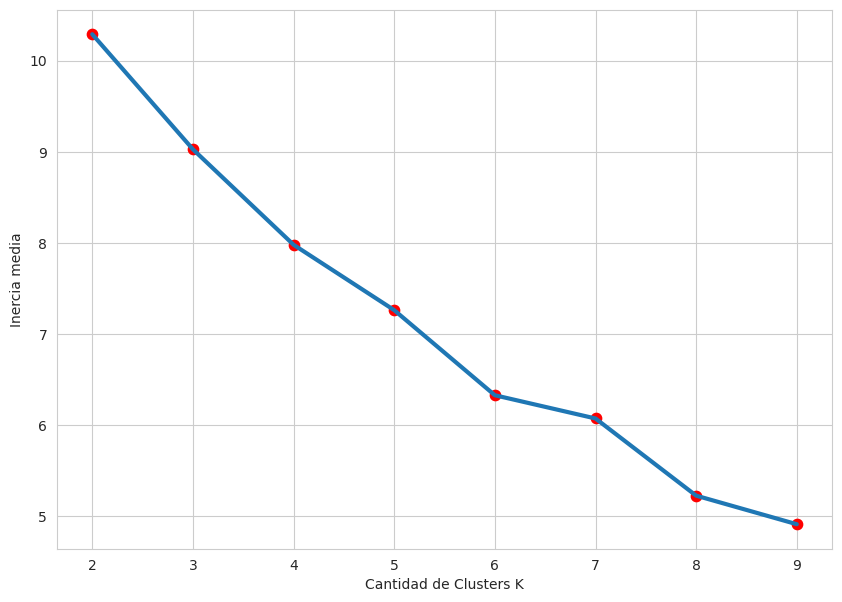

In [472]:
# Se grafica la distancia media en función del número de clústers
plt.figure(figsize=(10, 7))
plt.plot(K, Sum_of_squared_distances, lw=3)
plt.scatter(K, Sum_of_squared_distances, s=55, c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')

plt.show()

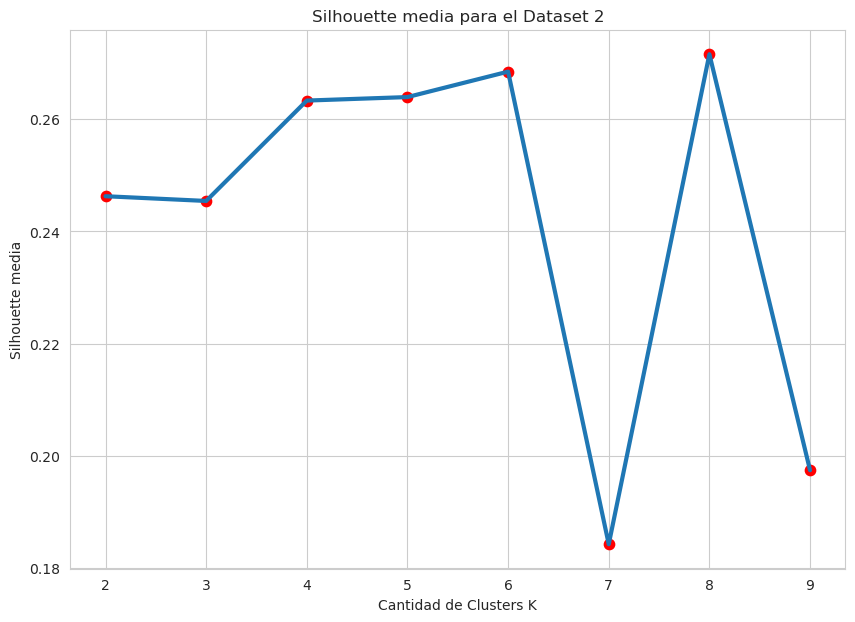

In [473]:
plt.figure(figsize = (10,7))
plt.plot(K, lista_sil, lw=3)
plt.scatter(K, lista_sil,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Silhouette media')
plt.title('Silhouette media para el Dataset 2')

plt.show()

In [474]:
N = 3
km = KMeans(n_clusters=N, random_state=0)

In [475]:
km.fit(X)

KMeans(n_clusters=3, random_state=0)

In [477]:
clusters = pd.DataFrame(data=km.cluster_centers_, columns=X.columns)

In [478]:
clusters

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,...,laundry_2,laundry_3,laundry_4,parking_0,parking_1,parking_2,parking_3,parking_4,parking_5,parking_6
0,-0.043314,-0.029008,0.032852,0.406405,0.427601,-0.744518,3.078657,1.170247,0.626594,0.030608,...,0.003493,0.137700,0.673071,0.233188,0.103057,0.075400,0.004949,0.518777,0.062009,0.002620
1,-0.037929,-0.010123,-0.017477,0.608848,0.551996,0.111381,-0.301605,-0.117355,-0.115085,-0.019772,...,0.004769,0.227943,0.485228,0.088591,0.116962,0.038839,0.010023,0.705695,0.039648,0.000242
2,0.105354,0.033927,0.030969,-1.595031,-1.465781,-0.019232,-0.301605,-0.108147,0.067364,0.037218,...,0.020930,0.146705,0.648547,0.113372,0.063857,0.039341,0.003973,0.741473,0.037500,0.000484


In [482]:
km.predict(X)

array([2, 2, 0, ..., 1, 2, 1], dtype=int32)

Guardando las predicciones del Modelo No Supervisado en una archivo .csv

In [485]:
# Guardamos en una variable nuestras predicciones
y_test_final_ns = km.predict(X)

In [504]:
# Guardamos nuestro archivo con las predicciones en la carpeta `No_supervisado`
Oscarszdz = pd.DataFrame(y_test_final_ns)
Oscarszdz.to_csv('Oscarszdz', index=False)

# Agregando nombre a la columna en el archivo Oscarszdz.csv
Oscarszdz.columns = ['pred']
Oscarszdz.to_csv('No_supervisado/Oscarszdz.csv', index=False)